In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.ticker as ticker
from matplotlib.lines import Line2D
from matplotlib.legend_handler import HandlerBase

In [2]:
### Define parameters ###
# [version] is the SEVN version adopted                             e.g. 'sevn_tides_fix6Agodadt'
# [Z] is the metallicity of the stars                               e.g. '02' for Z=0.00142 or 0.000142
# [tides] is the tidal prescription adopted                         e.g. 'tides_simple' or 'disabled'

sevn_version = 'sevn_25ago'              # SEVN version adopted 
angmoms1 = ['1.5']        # angular momentum model      # angmoms= ['-2', '-1', '1','1.5']
angmoms2 = ['1.5']        # angular momentum model      # angmoms= ['-2', '-1', '1','1.5']
Zs = ['0.00142','0.000142']              # metallicity                 # Zs = ['0.00142','0.000142']
tides = ['tides_simple','disabled']     # tides model	           # tides = ['tides_simple', 'disabled']

fate_type = 'BHBH_GW'
binary_type = 'MSBH'

In [3]:
# set parameters
plt.rcParams.update({'text.usetex': True, 
                     'font.family': 'serif', 
                     'font.size': 30})
path_plots = f'./v_{sevn_version}/plot_hist/'
os.makedirs(path_plots, exist_ok=True)

# Delay times

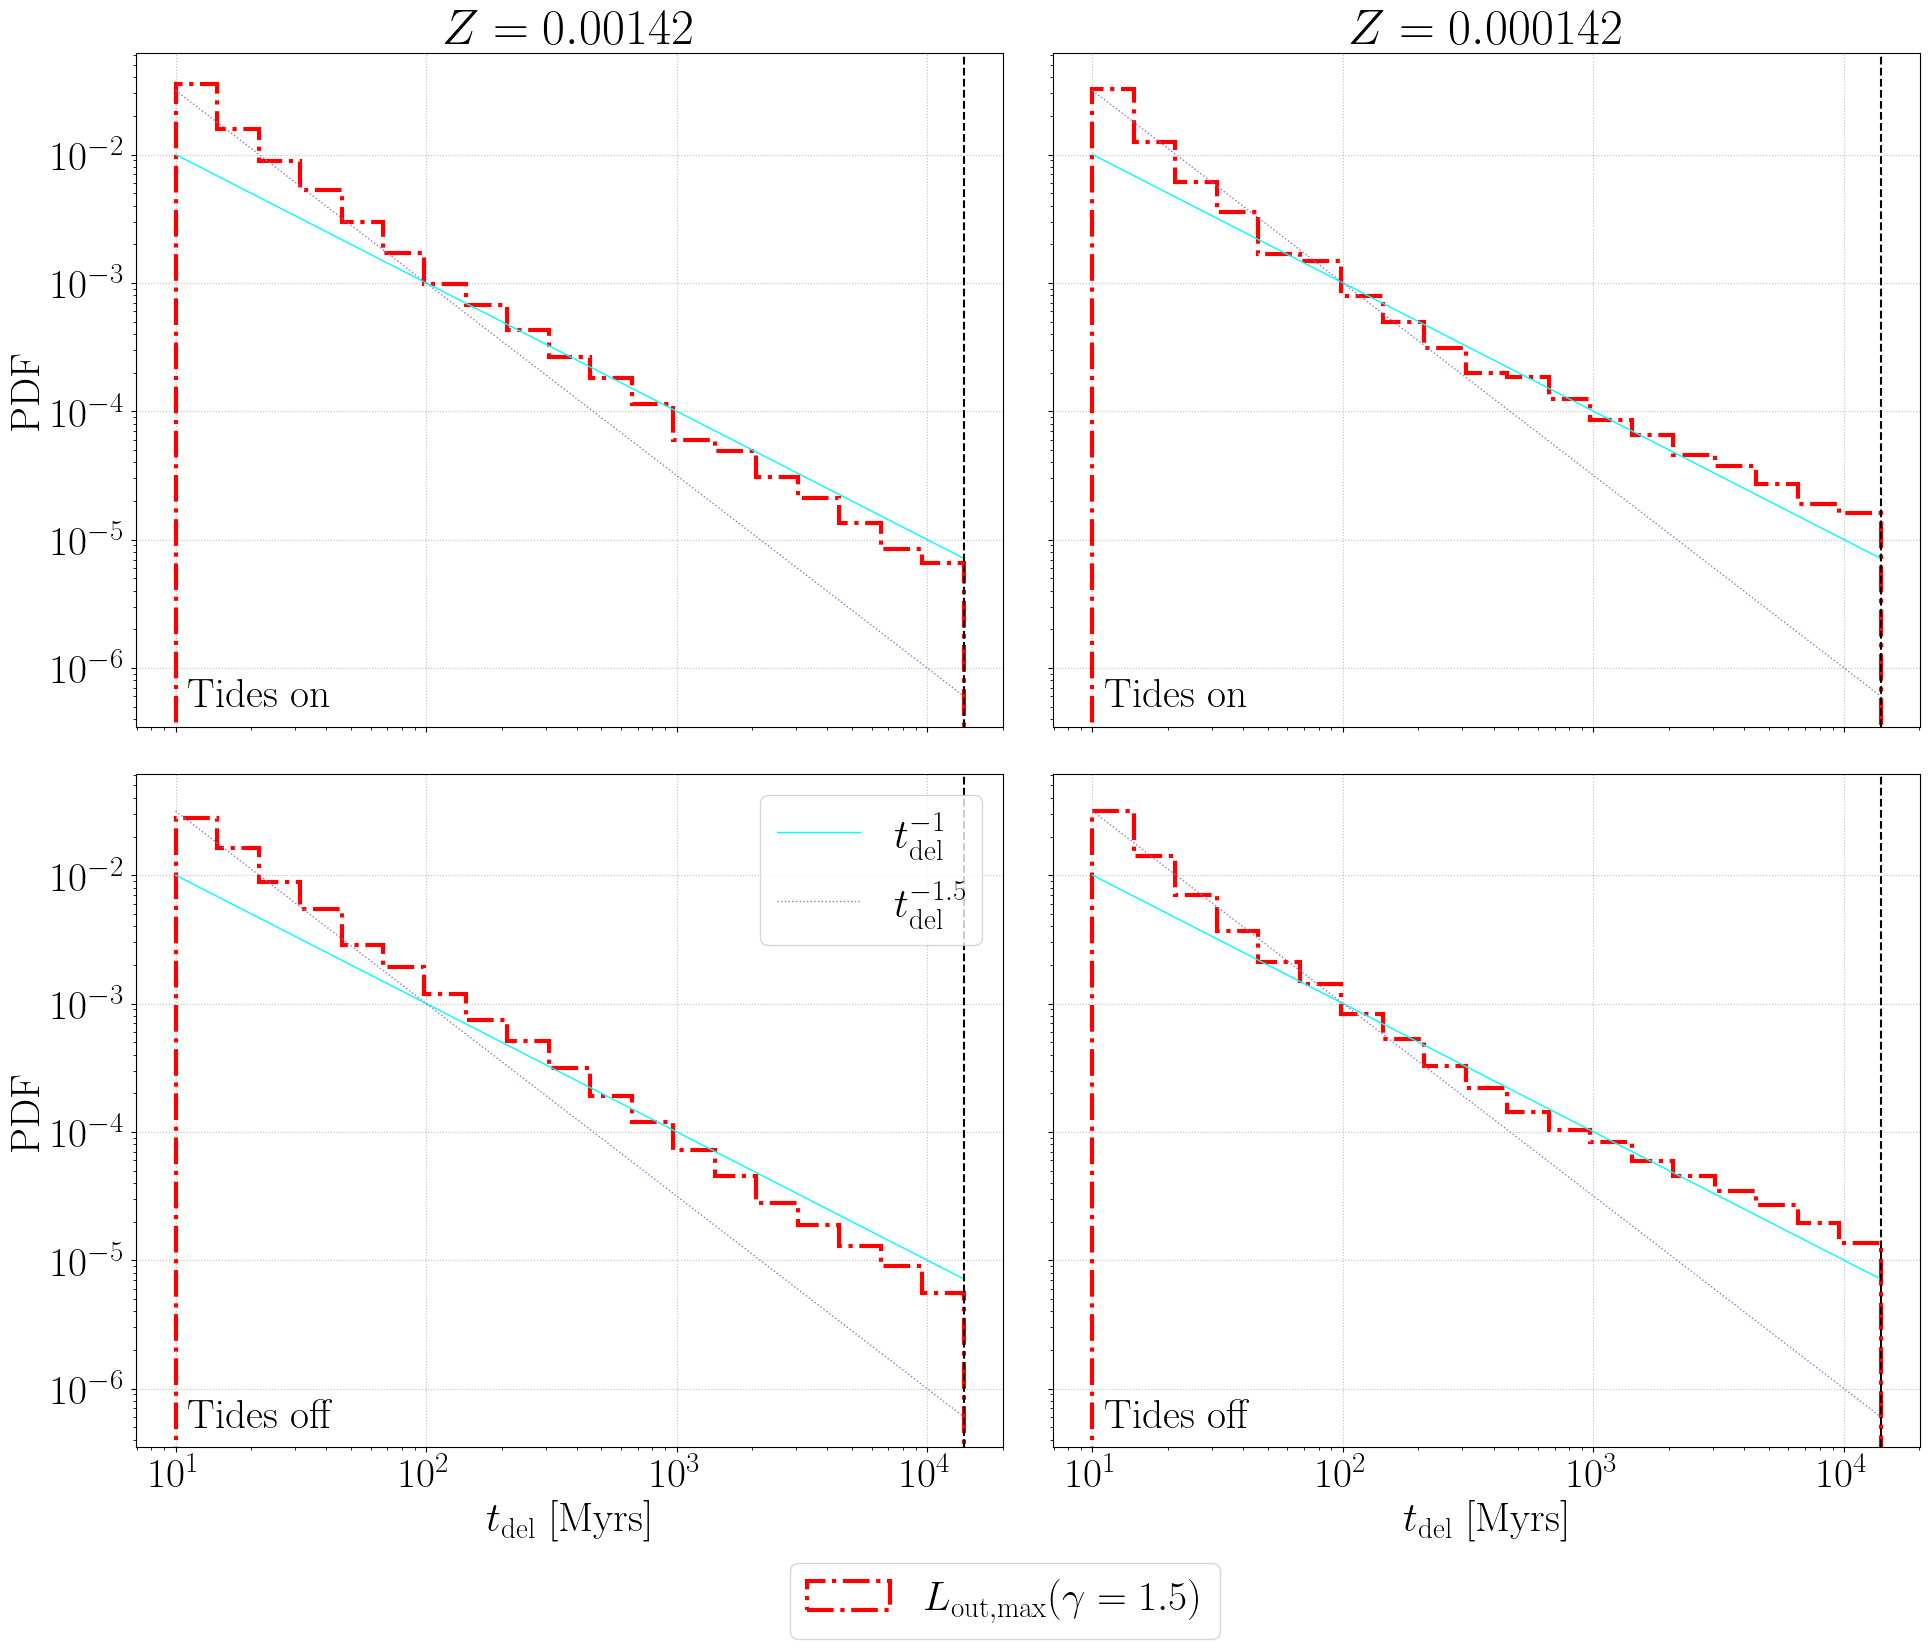

In [4]:
fig, axs = plt.subplots(nrows=len(tides), ncols=len(Zs), sharex=True, sharey=True, figsize=(20,17))   #20,30
bin_edges_mass=np.arange(0,151,5)       # 5 M_sun is the witdth of each bin
bin_edges_period=np.logspace(np.log10(1e-4),np.log10(1e2),20)
bin_edges_q=np.arange(0,1.01,0.01)       # 0.01 is the witdth of each bin
bin_edges_GWtime = np.logspace(np.log10(10),np.log10(1.4e4),20)



labels1=['Isotropic re-emission','Jeans mode',r'$L_{\rm out,min} (\gamma =1 )$',r'$L_{\rm out,max} (\gamma = 1.5)$']
labels2=[r'$L_{\rm out,max} (\gamma = 1.5)$']
tidelabels = [r'Tides on' ,r'Tides off']
colors1=['k','dodgerblue','darkgreen','red']
colors2=['red']
linestyles1=['solid','dashed','dotted','dashdot']
linestyles2=['dashdot']

for Z, icol in zip(Zs,np.arange(0,len(Zs))):
    labels, colors, linestyles,angmoms = labels2, colors2,linestyles2,angmoms2
    for tide, irow, tidelabel in zip(tides,np.arange(0,len(tides)),tidelabels):
        for angmom, label, color,linestyle in zip(angmoms, labels, colors,linestyles):
            path_results = f'./v_{sevn_version}'  # path to new folder with all useful results
            df = pd.read_csv(f'{path_results}/remnants/BHBH_GW/Z{Z}_{angmom}_{tide}_r_BHBH_GW.csv')
            delay_time = df['GWtime']+df['BWorldtime']
            axs[irow][icol].hist(delay_time, bins=bin_edges_GWtime, label=label, color=color, linestyle=linestyle, lw=3, log=True, histtype='step',density=True)
            # add slopes (multiply by 0.1 to vertically downshift t**-1 in the logplane)
            if irow == 0 and icol == 0:
                axs[irow][icol].plot(bin_edges_GWtime,0.1* (bin_edges_GWtime)**(-1), color='cyan',linestyle='solid', lw=1)
                axs[irow][icol].plot(bin_edges_GWtime,bin_edges_GWtime**(-1.5), color='mediumpurple',linestyle='dotted', lw=1)
            else:
                axs[irow][icol].plot(bin_edges_GWtime,0.1* (bin_edges_GWtime)**(-1), color='cyan',linestyle='solid', lw=1, label = r'$t_{\rm del}^{-1}$')
                axs[irow][icol].plot(bin_edges_GWtime,bin_edges_GWtime**(-1.5), color='mediumpurple',linestyle='dotted', lw=1, label = r'$t_{\rm del}^{-1.5}$')                
            #axs[irow][icol].hist(df1['GWtime'], bins=bin_edges_GWtime, label=label2, fc=color2, ec=color, linestyle=linestyle, lw=3, log=True, histtype='stepfilled', alpha=0.2,density=True)
        
        axs[irow][icol].set_xscale('log')
        axs[irow][icol].axvline(14000, linestyle='dashed',color='k') 
        #axs[irow][icol].set_xticks(np.array([0,10,20,30,40,50]))
        axs[irow][icol].annotate(tidelabel, (0.06,0.03),xycoords='axes fraction', color='k',ha='left')
        axs[irow][icol].grid(color='grey',alpha=0.5, linestyle='dotted')

        
#plt.suptitle(r'Primary mass distribution $M_1$ of BBH and GW-BBH')
axs[0][0].set_title(r'$Z=0.00142$')
axs[0][1].set_title(r'$Z=0.000142$')
axs[0][0].set_ylabel(r'PDF')
axs[1][0].set_ylabel(r'PDF')
axs[1][0].set_xlabel(r'$t_{\rm del}$ [Myrs]')
axs[1][1].set_xlabel(r'$t_{\rm del}$ [Myrs]')


handles, labels = axs[0][0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=4, bbox_to_anchor=(0.52,0.005))
handles1, labels1 = axs[1][0].get_legend_handles_labels()
axs[1][0].legend(handles1[1:3], labels1[1:3], loc='upper right', ncol=1)
plt.tight_layout()
fig.subplots_adjust(bottom=0.13, top=0.95)
plt.show()
fig.savefig(f'{path_plots}BBH_GWtime.pdf')


# Final semimajor

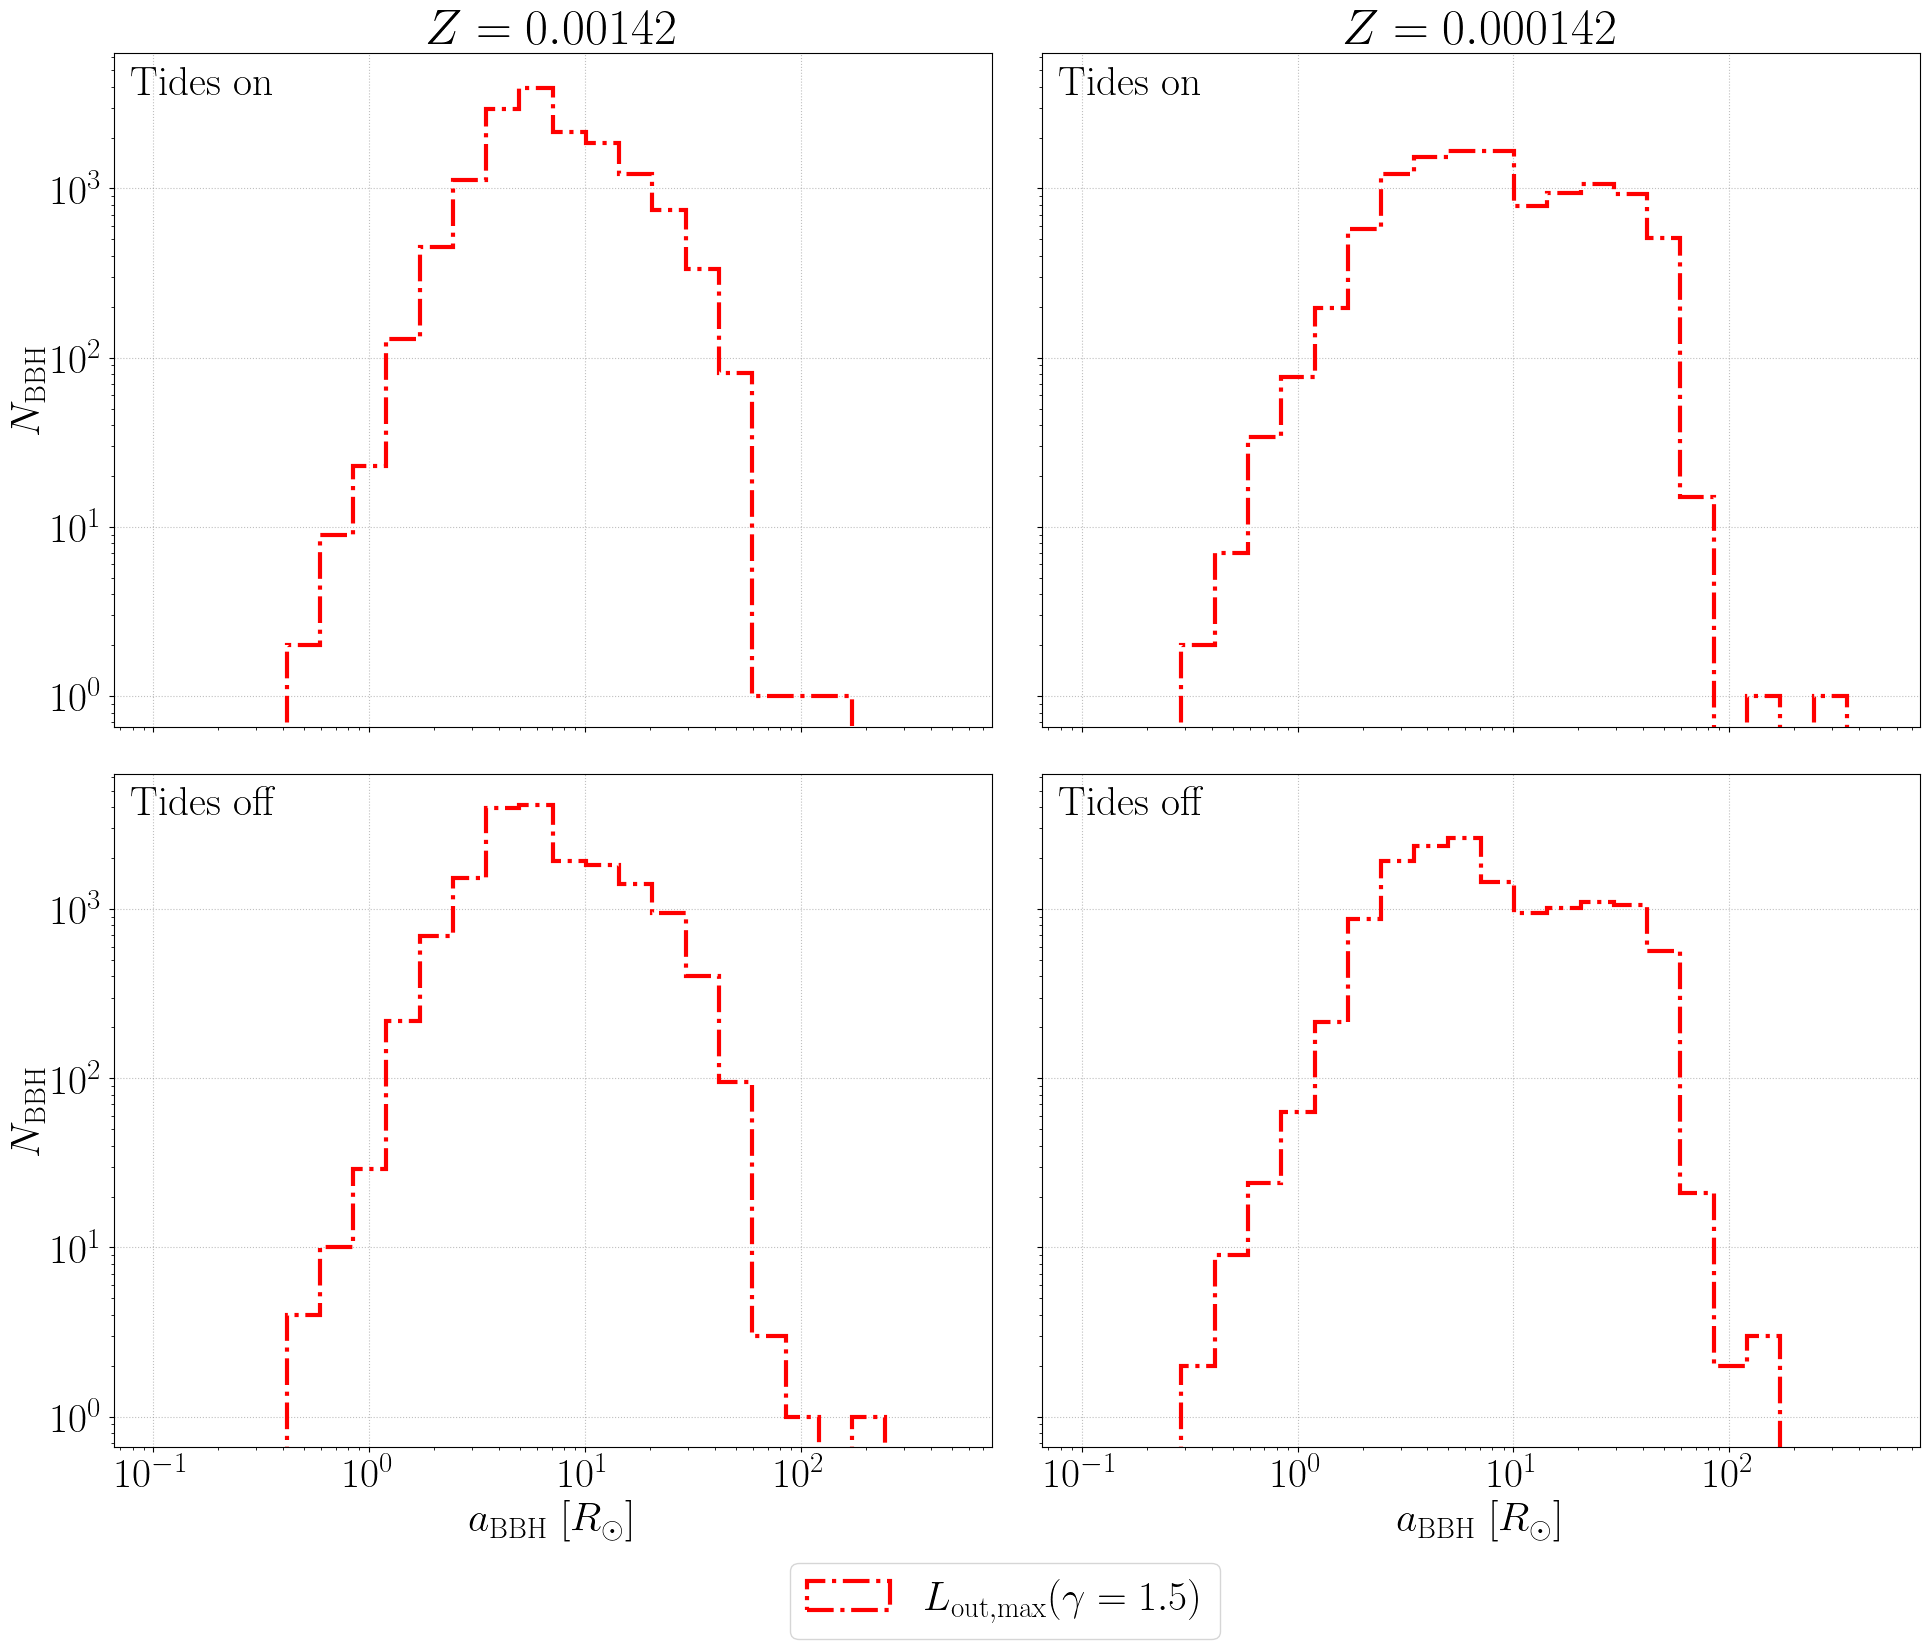

In [5]:
fig, axs = plt.subplots(nrows=len(tides), ncols=len(Zs), sharex=True, sharey=True, figsize=(20,17))   #20,30
bin_edges_semimajor=np.logspace(np.log10(0.1),np.log10(500),25)  # divide into 25 bins


labels1=['Isotropic re-emission','Jeans mode',r'$L_{\rm out,min} (\gamma =1 )$',r'$L_{\rm out,max} (\gamma = 1.5)$']
labels2=[r'$L_{\rm out,max} (\gamma = 1.5)$']
tidelabels = [r'Tides on' ,r'Tides off']
colors1=['k','dodgerblue','darkgreen','red']
colors2=['red']
linestyles1=['solid','dashed','dotted','dashdot']
linestyles2=['dashdot']

for Z, icol in zip(Zs,np.arange(0,len(Zs))):
    labels, colors, linestyles,angmoms = labels2, colors2,linestyles2,angmoms2
    for tide, irow, tidelabel in zip(tides,np.arange(0,len(tides)),tidelabels):
        for angmom, label, color,linestyle in zip(angmoms, labels, colors,linestyles):
            path_results = f'./v_{sevn_version}'  # path to new folder with all useful results
            df = pd.read_csv(f'{path_results}/remnants/BHBH_GW/Z{Z}_{angmom}_{tide}_r_BHBH_GW.csv')
            axs[irow][icol].hist(df['Semimajor'], bins=bin_edges_semimajor, label=label, color=color, linestyle=linestyle, lw=3, log=True, histtype='step',density=False)
        
        axs[irow][icol].set_xscale('log')
        #axs[irow][icol].set_xticks(np.array([0,10,20,30,40,50]))
        axs[irow][icol].annotate(tidelabel, (0.02,0.94),xycoords='axes fraction', color='k',ha='left')
        axs[irow][icol].grid(color='grey',alpha=0.5, linestyle='dotted')
        
#plt.suptitle(r'Primary mass distribution $M_1$ of BBH and GW-BBH')
axs[0][0].set_title(r'$Z=0.00142$')
axs[0][1].set_title(r'$Z=0.000142$')
axs[0][0].set_ylabel(r'$N_{\rm BBH}$')
axs[1][0].set_ylabel(r'$N_{\rm BBH}$')
axs[1][0].set_xlabel(r'$a_{\rm BBH}$ [$R_\odot$]')
axs[1][1].set_xlabel(r'$a_{\rm BBH}$ [$R_\odot$]')


handles, labels = axs[0][0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=4, bbox_to_anchor=(0.52,0.005))   
plt.tight_layout()
fig.subplots_adjust(bottom=0.13, top=0.95)
plt.show()
fig.savefig(f'{path_plots}BBH_aBBH.pdf')


# Mass of the primary BH, intended as the maximum one

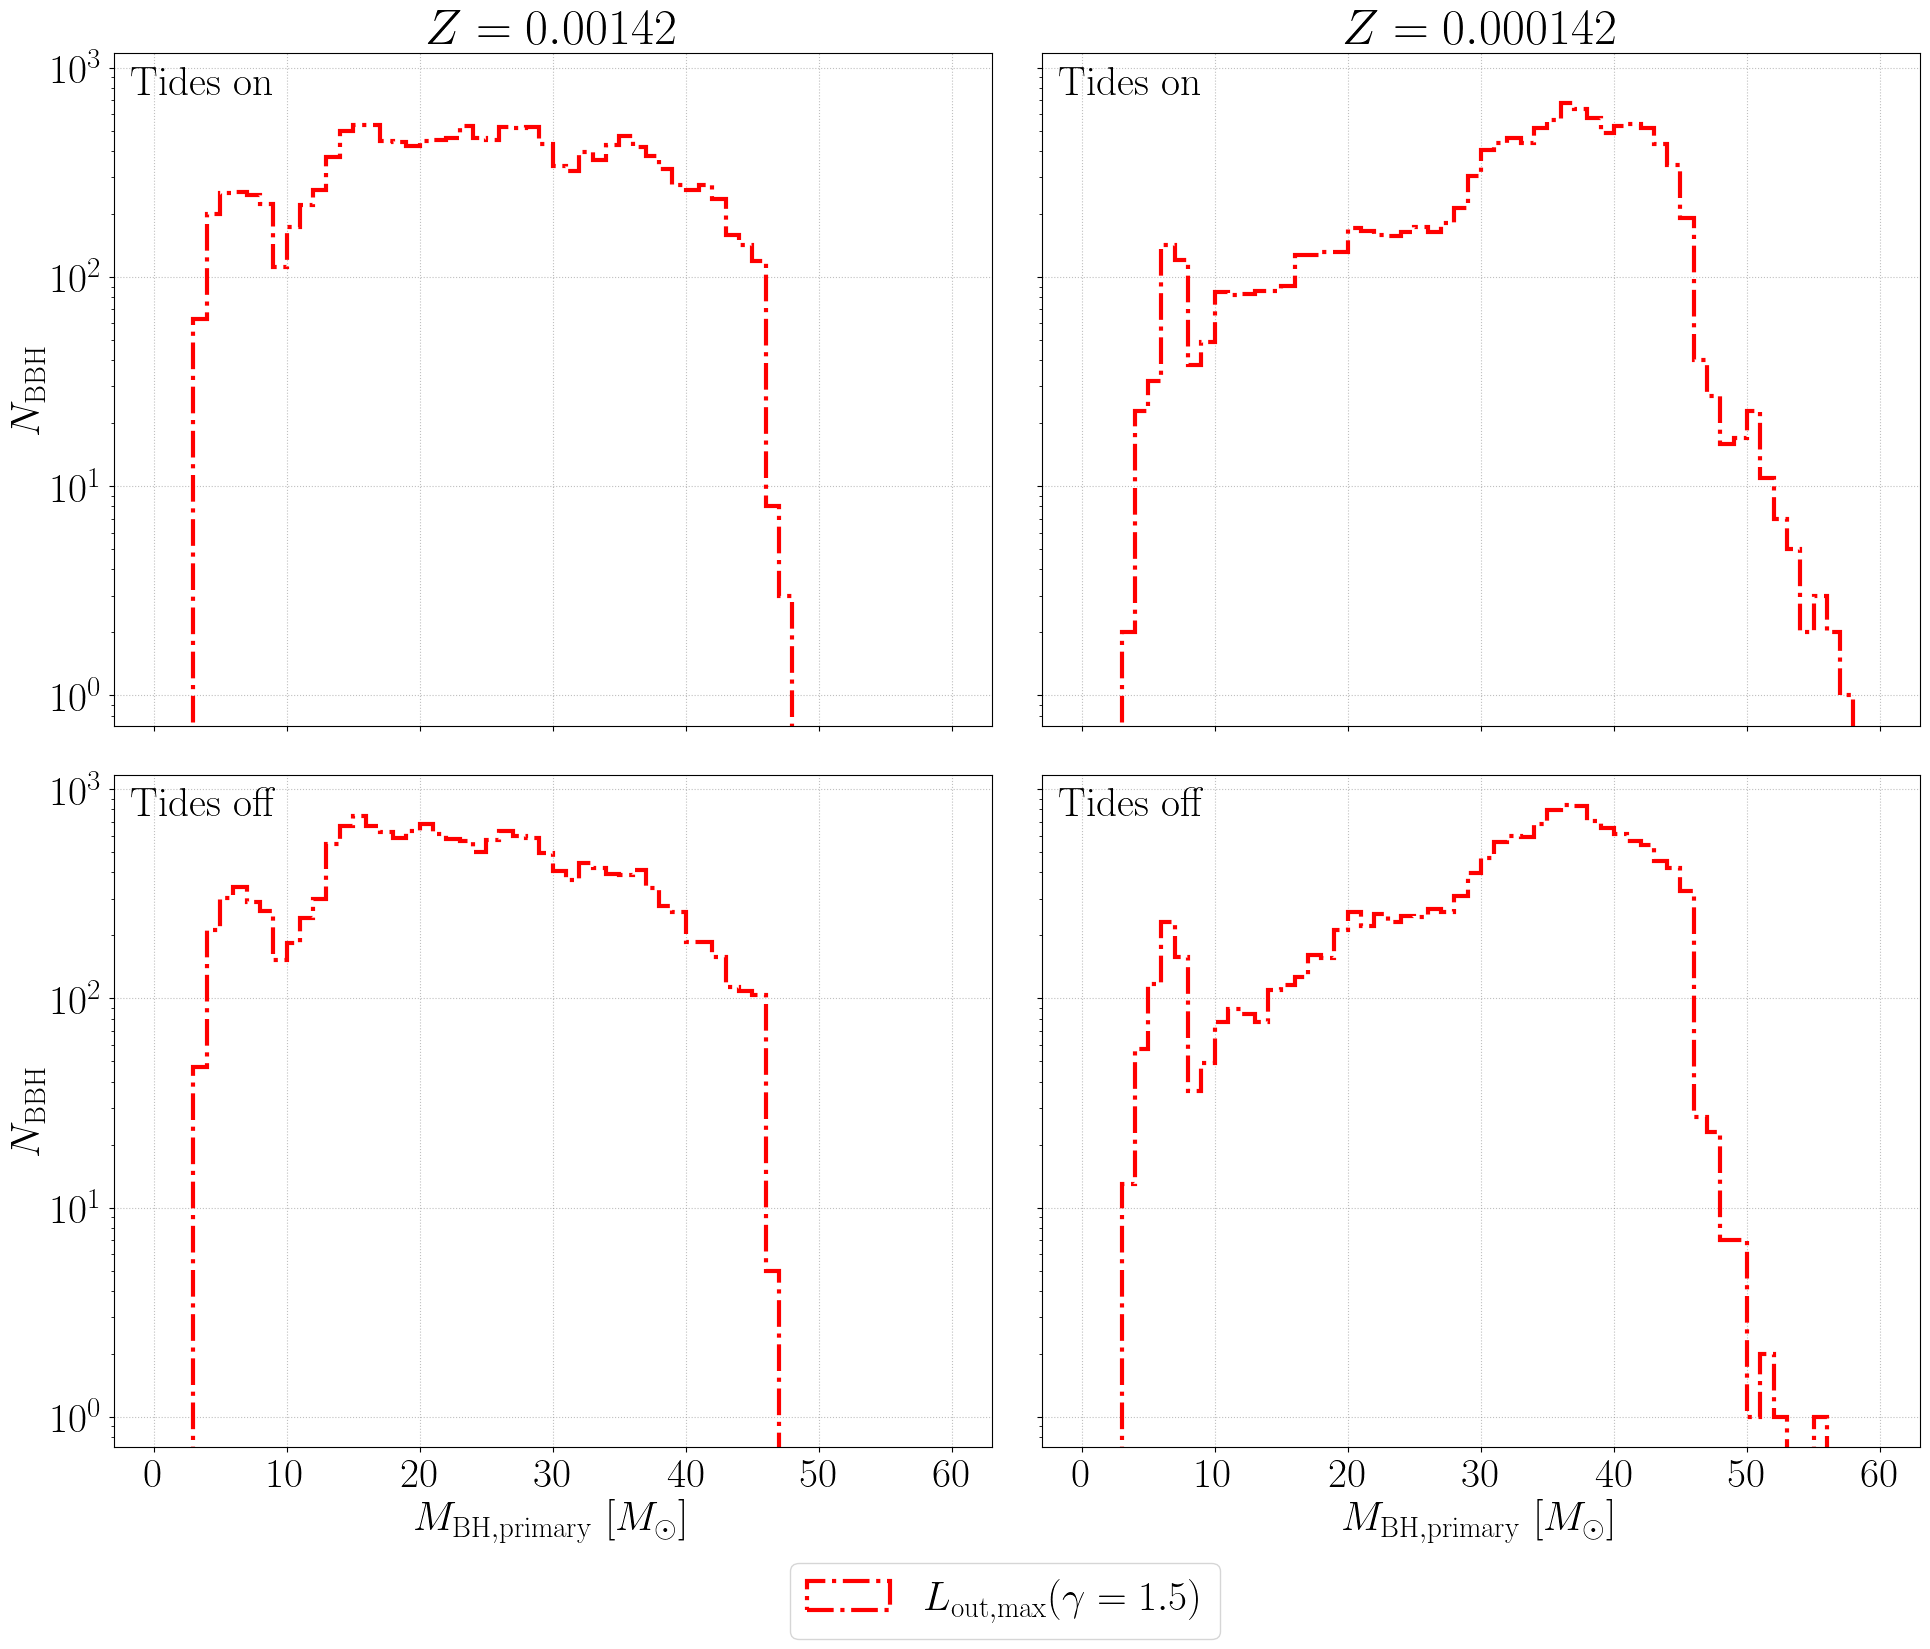

In [6]:
fig, axs = plt.subplots(nrows=len(tides), ncols=len(Zs), sharex=True, sharey=True, figsize=(20,17))   #20,30
bin_edges_mass=np.arange(0,61,1)       # 1 M_sun is the witdth of each bin

labels1=['Isotropic re-emission','Jeans mode',r'$L_{\rm out,min} (\gamma =1 )$',r'$L_{\rm out,max} (\gamma = 1.5)$']
labels2=[r'$L_{\rm out,max} (\gamma = 1.5)$']
tidelabels = [r'Tides on' ,r'Tides off']
colors1=['k','dodgerblue','darkgreen','red']
colors2=['red']
linestyles1=['solid','dashed','dotted','dashdot']
linestyles2=['dashdot']

for Z, icol in zip(Zs,np.arange(0,len(Zs))):
    labels, colors, linestyles,angmoms = labels2, colors2,linestyles2,angmoms2
    for tide, irow, tidelabel in zip(tides,np.arange(0,len(tides)),tidelabels):
        for angmom, label, color,linestyle in zip(angmoms, labels, colors,linestyles):
            path_results = f'./v_{sevn_version}'  # path to new folder with all useful results
            df = pd.read_csv(f'{path_results}/remnants/BHBH_GW/Z{Z}_{angmom}_{tide}_r_BHBH_GW.csv')
            df['Mass_max'] = np.max(df[['Mass_0','Mass_1']],axis=1)

            axs[irow][icol].hist(df['Mass_max'], bins=bin_edges_mass, label=label, color=color, linestyle=linestyle, lw=3, log=True, histtype='step',density=False)
        axs[irow][icol].set_xticks(np.array([0,10,20,30,40,50,60]))
        axs[irow][icol].annotate(tidelabel, (0.02,0.94),xycoords='axes fraction', color='k',ha='left')
        axs[irow][icol].grid(color='grey',alpha=0.5, linestyle='dotted')
        
#plt.suptitle(r'Primary mass distribution $M_1$ of BBH and GW-BBH')
axs[0][0].set_title(r'$Z=0.00142$')
axs[0][1].set_title(r'$Z=0.000142$')
axs[0][0].set_ylabel(r'$N_{\rm BBH}$')
axs[1][0].set_ylabel(r'$N_{\rm BBH}$')
#axs[2][0].set_ylabel(r'PDF')
#axs[3][0].set_ylabel(r'PDF')
axs[1][0].set_xlabel(r'$M_{\rm BH, primary}$ [$M_\odot$]')
axs[1][1].set_xlabel(r'$M_{\rm BH, primary}$ [$M_\odot$]')


handles, labels = axs[0][0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=4, bbox_to_anchor=(0.52,0.005))   
plt.tight_layout()
fig.subplots_adjust(bottom=0.13, top=0.95)
plt.show()
fig.savefig(f'{path_plots}BBH_MBHprimary.pdf')


# Mass of the BH to form first

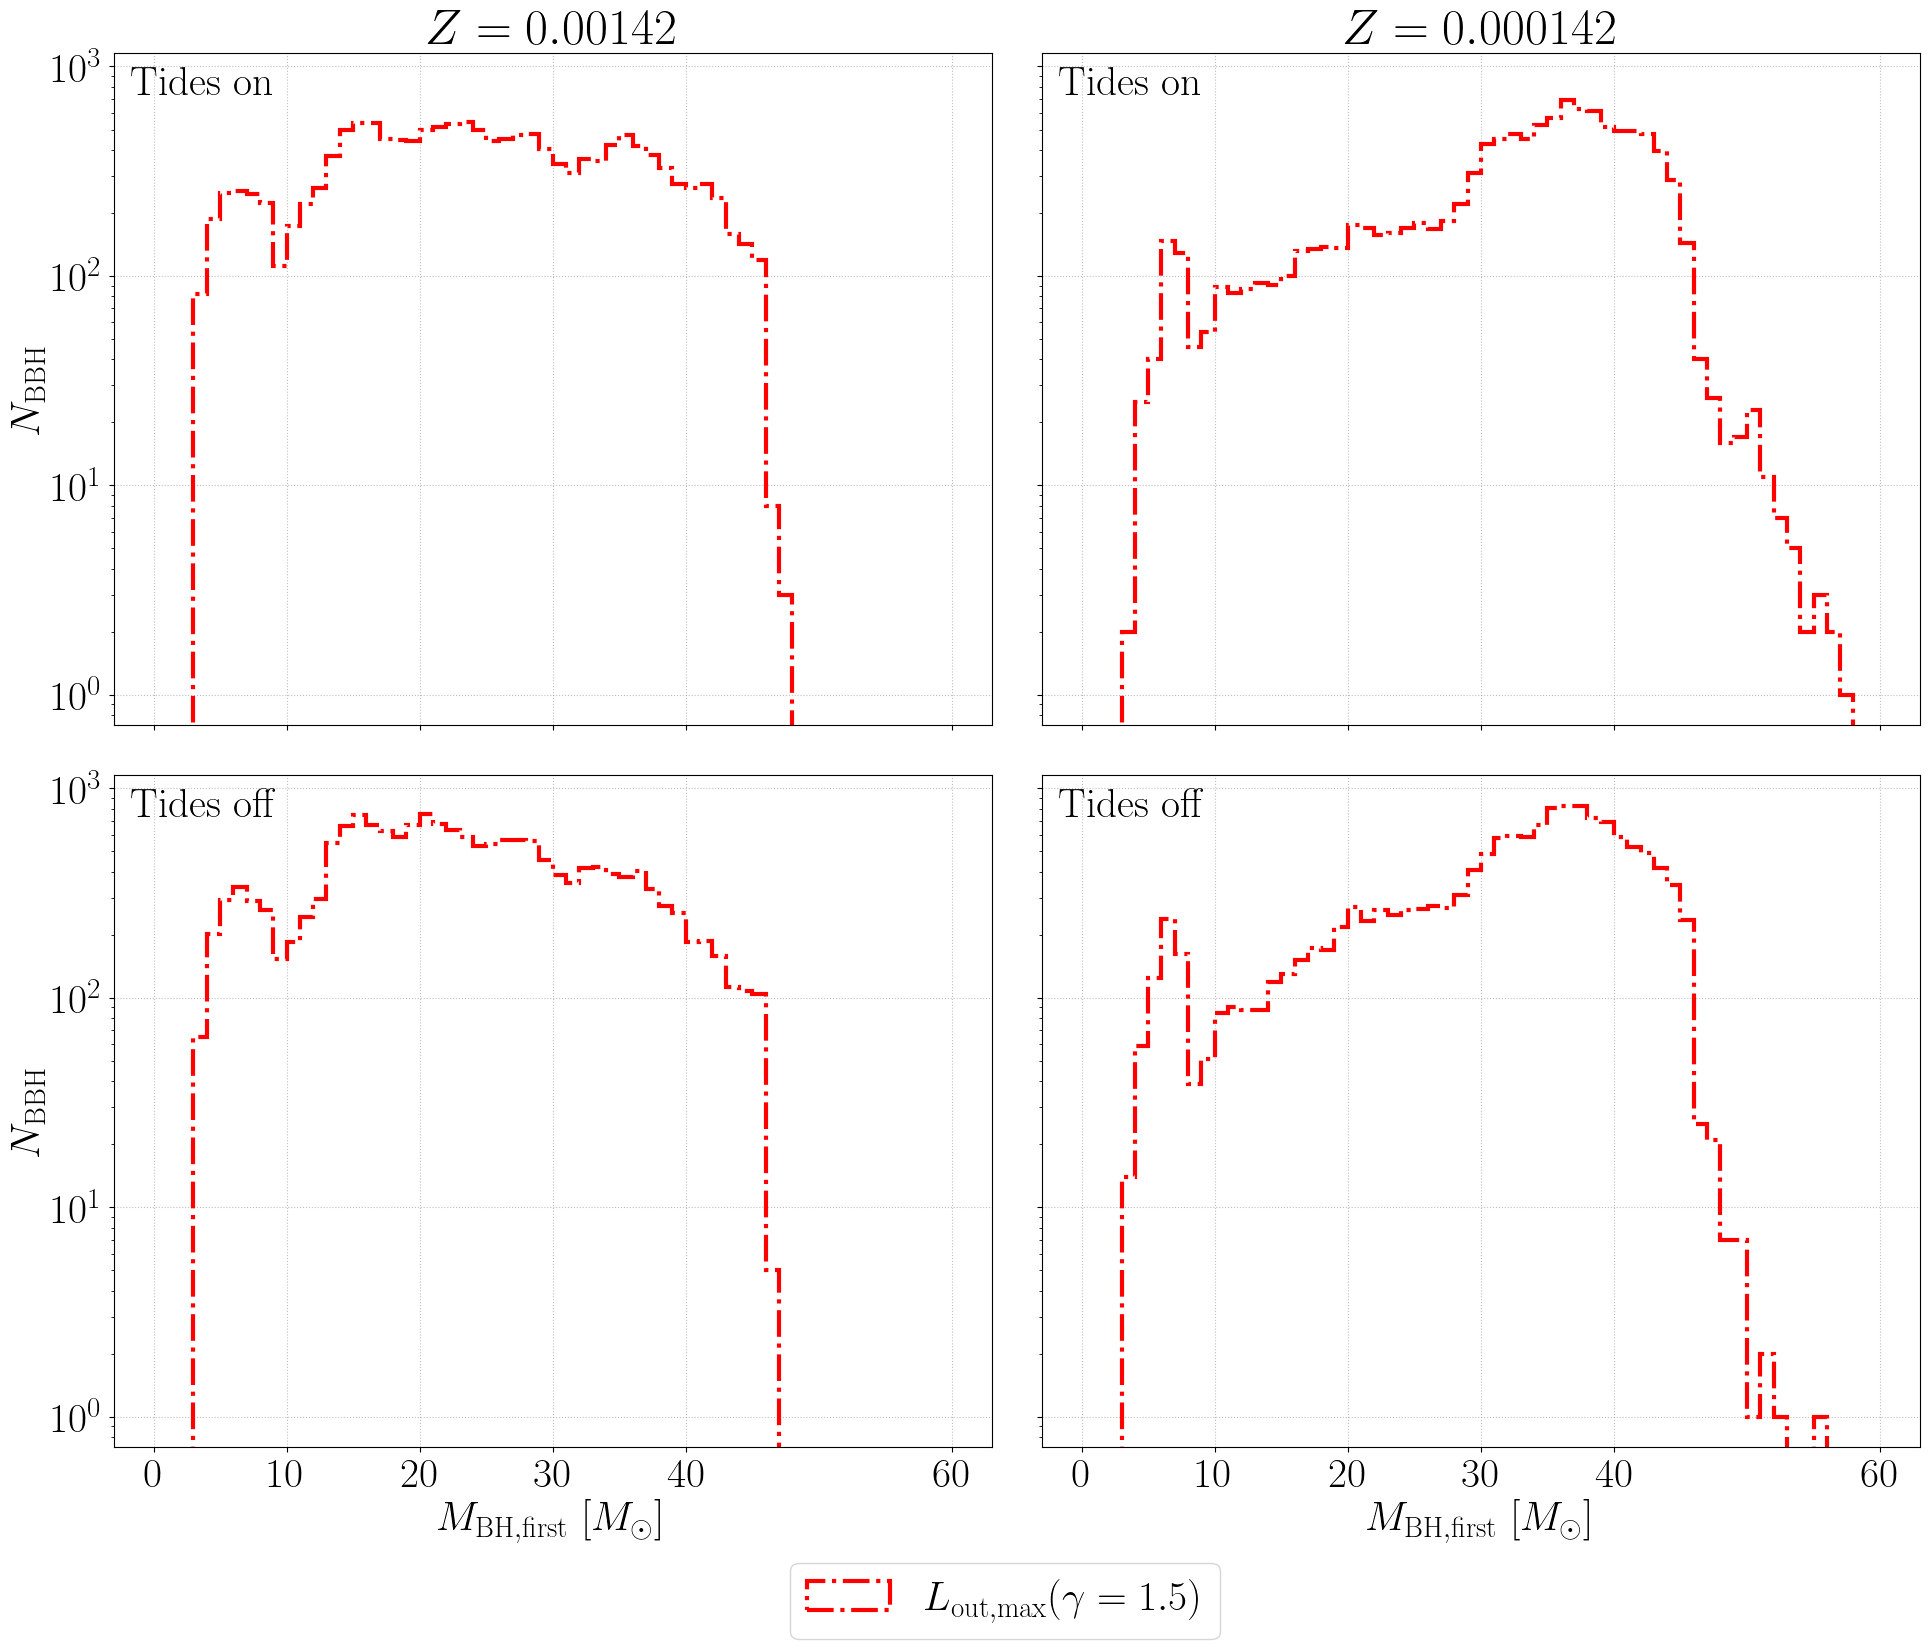

In [7]:
fig, axs = plt.subplots(nrows=len(tides), ncols=len(Zs), sharex=True, sharey=True, figsize=(20,17))   #20,30
bin_edges_mass=np.arange(0,61,1)       # 1 M_sun is the witdth of each bin

labels1=['Isotropic re-emission','Jeans mode',r'$L_{\rm out,min} (\gamma =1 )$',r'$L_{\rm out,max} (\gamma = 1.5)$']
labels2=[r'$L_{\rm out,max} (\gamma = 1.5)$']
tidelabels = [r'Tides on' ,r'Tides off']
colors1=['k','dodgerblue','darkgreen','red']
colors2=['red']
linestyles1=['solid','dashed','dotted','dashdot']
linestyles2=['dashdot']

for Z, icol in zip(Zs,np.arange(0,len(Zs))):
    labels, colors, linestyles,angmoms = labels2, colors2,linestyles2,angmoms2
    for tide, irow, tidelabel in zip(tides,np.arange(0,len(tides)),tidelabels):
        for angmom, label, color,linestyle in zip(angmoms, labels, colors,linestyles):
            path_results = f'./v_{sevn_version}'  # path to new folder with all useful results
            df = pd.read_csv(f'{path_results}/remnants/BHBH_GW/Z{Z}_{angmom}_{tide}_r_BHBH_GW.csv')

            axs[irow][icol].hist(df['Mass_0'], bins=bin_edges_mass, label=label, color=color, linestyle=linestyle, lw=3, log=True, histtype='step',density=False)
        axs[irow][icol].set_xticks(np.array([0,10,20,30,40,60]))
        axs[irow][icol].annotate(tidelabel, (0.02,0.94),xycoords='axes fraction', color='k',ha='left')
        axs[irow][icol].grid(color='grey',alpha=0.5, linestyle='dotted')
        
#plt.suptitle(r'Primary mass distribution $M_1$ of BBH and GW-BBH')
axs[0][0].set_title(r'$Z=0.00142$')
axs[0][1].set_title(r'$Z=0.000142$')
axs[0][0].set_ylabel(r'$N_{\rm BBH}$')
axs[1][0].set_ylabel(r'$N_{\rm BBH}$')
axs[1][0].set_xlabel(r'$M_{\rm BH, first}$ [$M_\odot$]')
axs[1][1].set_xlabel(r'$M_{\rm BH, first}$ [$M_\odot$]')


handles, labels = axs[0][0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=4, bbox_to_anchor=(0.52,0.005))   
plt.tight_layout()
fig.subplots_adjust(bottom=0.13, top=0.95)
plt.show()
fig.savefig(f'{path_plots}BBH_MBH0.pdf')


# Mass of the second BH formed

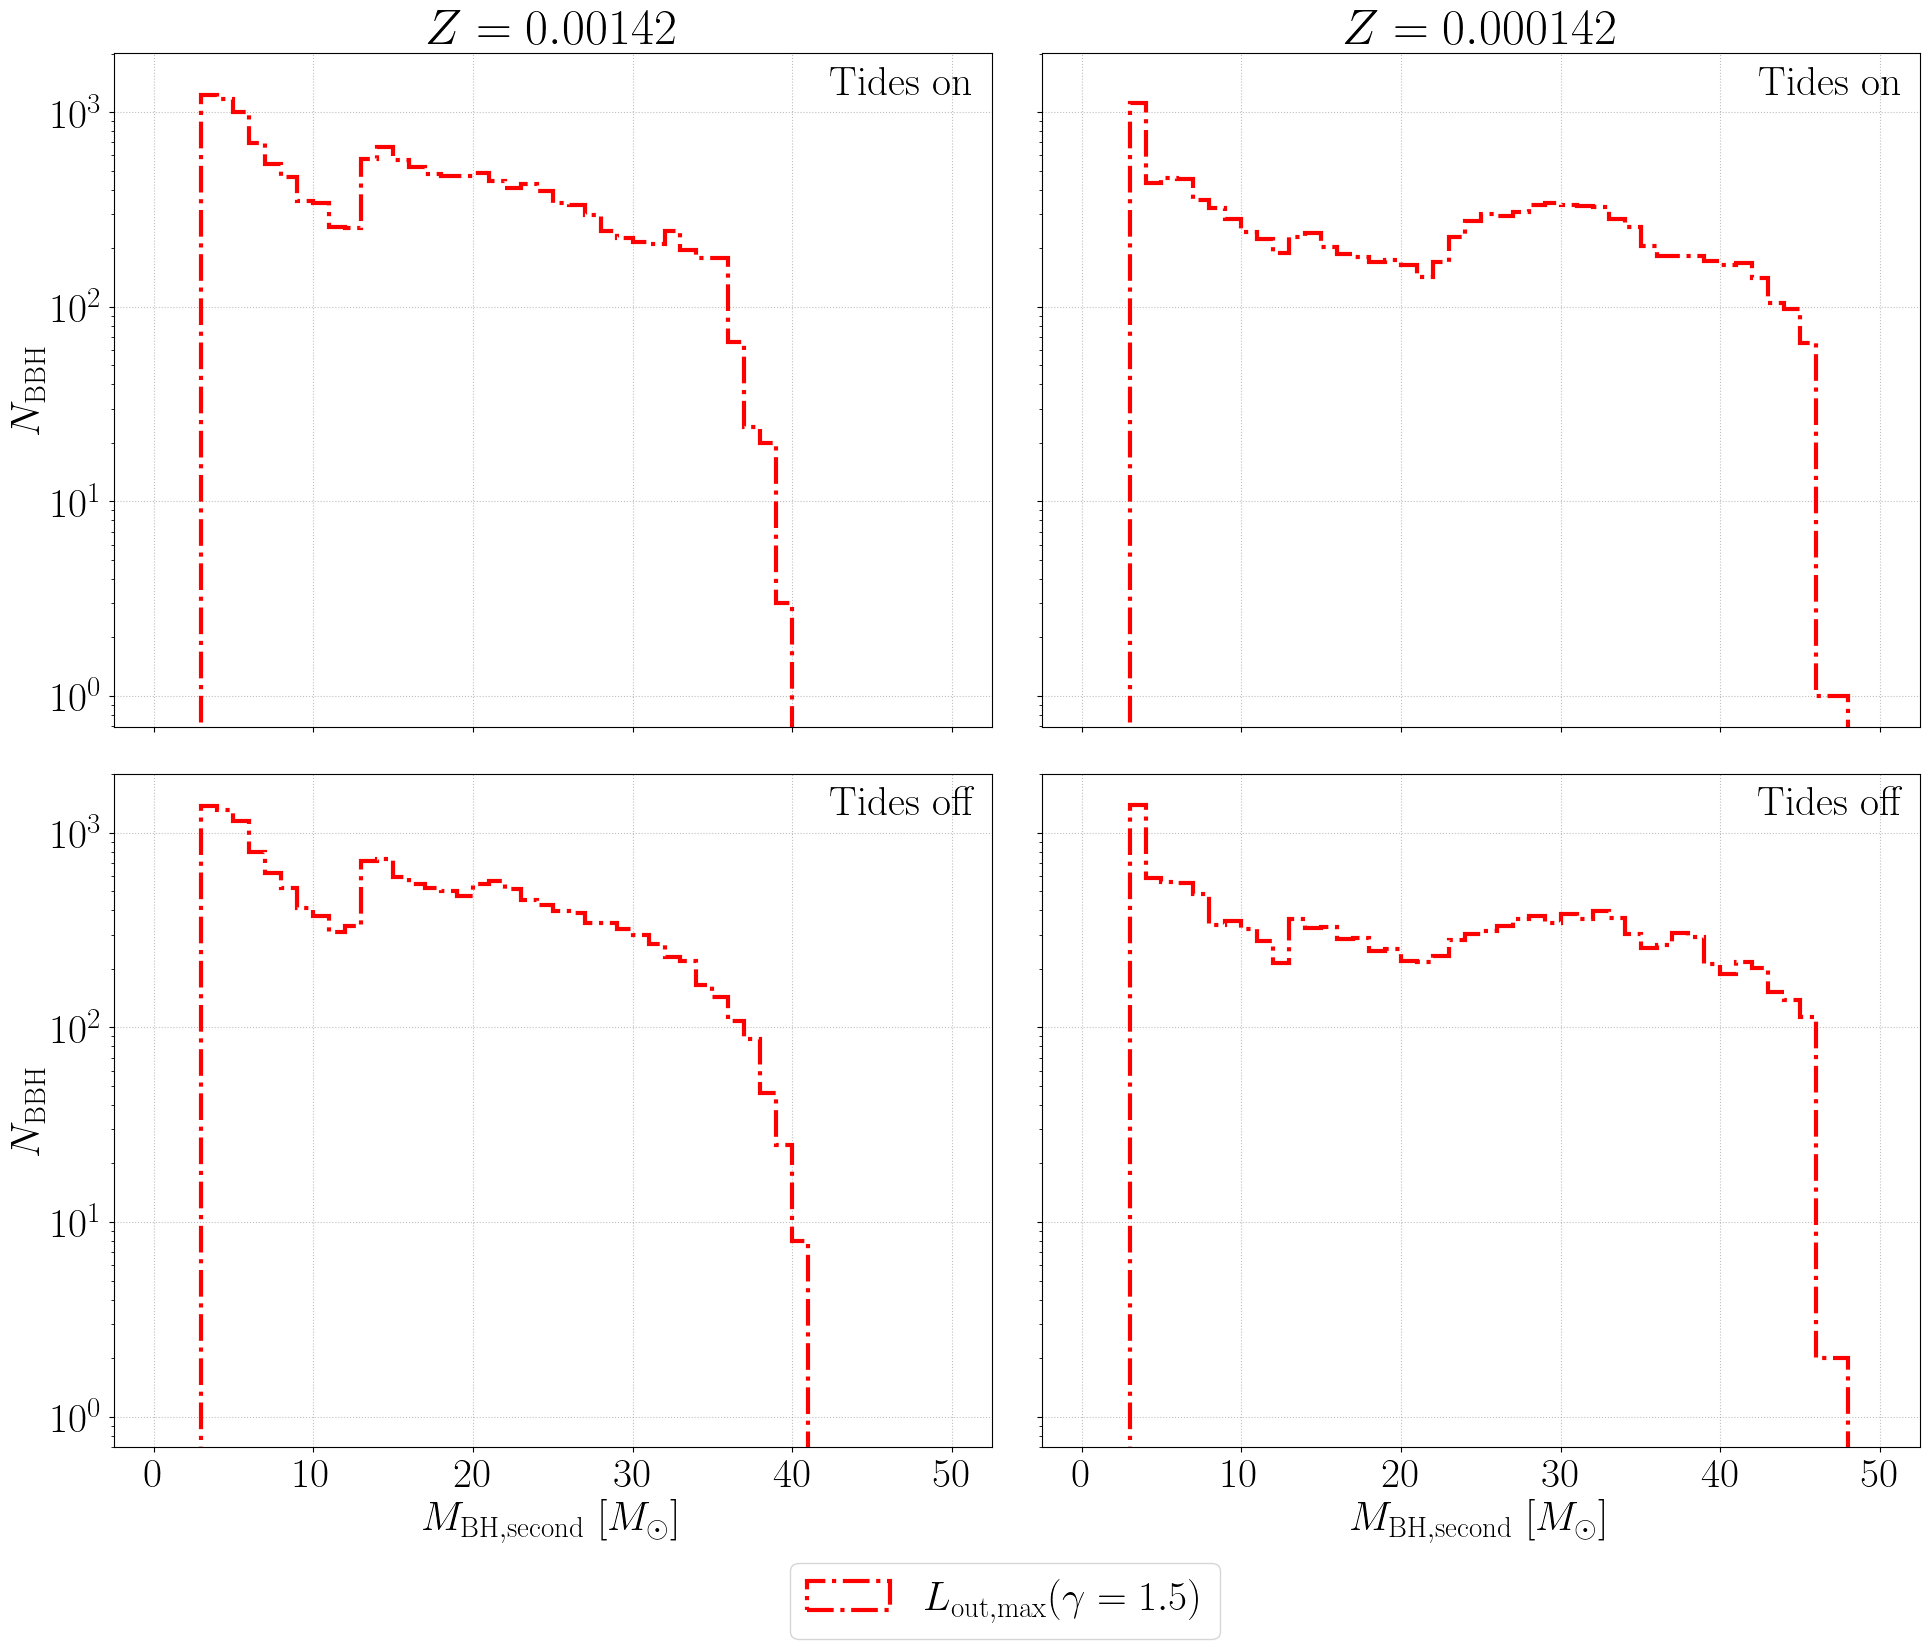

In [8]:
fig, axs = plt.subplots(nrows=len(tides), ncols=len(Zs), sharex=True, sharey=True, figsize=(20,17))   #20,30
bin_edges_mass=np.arange(0,51,1)       # 1 M_sun is the witdth of each bin


labels1=['Isotropic re-emission','Jeans mode',r'$L_{\rm out,min} (\gamma =1 )$',r'$L_{\rm out,max} (\gamma = 1.5)$']
labels2=[r'$L_{\rm out,max} (\gamma = 1.5)$']
tidelabels = [r'Tides on' ,r'Tides off']
colors1=['k','dodgerblue','darkgreen','red']
colors2=['red']
linestyles1=['solid','dashed','dotted','dashdot']
linestyles2=['dashdot']

for Z, icol in zip(Zs,np.arange(0,len(Zs))):
    labels, colors, linestyles,angmoms = labels2, colors2,linestyles2,angmoms2
    for tide, irow, tidelabel in zip(tides,np.arange(0,len(tides)),tidelabels):
        for angmom, label, color,linestyle in zip(angmoms, labels, colors,linestyles):
            path_results = f'./v_{sevn_version}'  # path to new folder with all useful results
            df = pd.read_csv(f'{path_results}/remnants/BHBH_GW/Z{Z}_{angmom}_{tide}_r_BHBH_GW.csv')

            axs[irow][icol].hist(df['Mass_1'], bins=bin_edges_mass, label=label, color=color, linestyle=linestyle, lw=3, log=True, histtype='step',density=False)
        axs[irow][icol].set_xticks(np.array([0,10,20,30,40,50]))
        axs[irow][icol].annotate(tidelabel, (0.98,0.94),xycoords='axes fraction', color='k',ha='right')
        axs[irow][icol].grid(color='grey',alpha=0.5, linestyle='dotted')
        
#plt.suptitle(r'Primary mass distribution $M_1$ of BBH and GW-BBH')
axs[0][0].set_title(r'$Z=0.00142$')
axs[0][1].set_title(r'$Z=0.000142$')
axs[0][0].set_ylabel(r'$N_{\rm BBH}$')
axs[1][0].set_ylabel(r'$N_{\rm BBH}$')
axs[1][0].set_xlabel(r'$M_{\rm BH, second}$ [$M_\odot$]')
axs[1][1].set_xlabel(r'$M_{\rm BH, second}$ [$M_\odot$]')


handles, labels = axs[0][0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=4, bbox_to_anchor=(0.52,0.005))   
plt.tight_layout()
fig.subplots_adjust(bottom=0.13, top=0.95)
plt.show()
fig.savefig(f'{path_plots}BBH_MBH1.pdf')


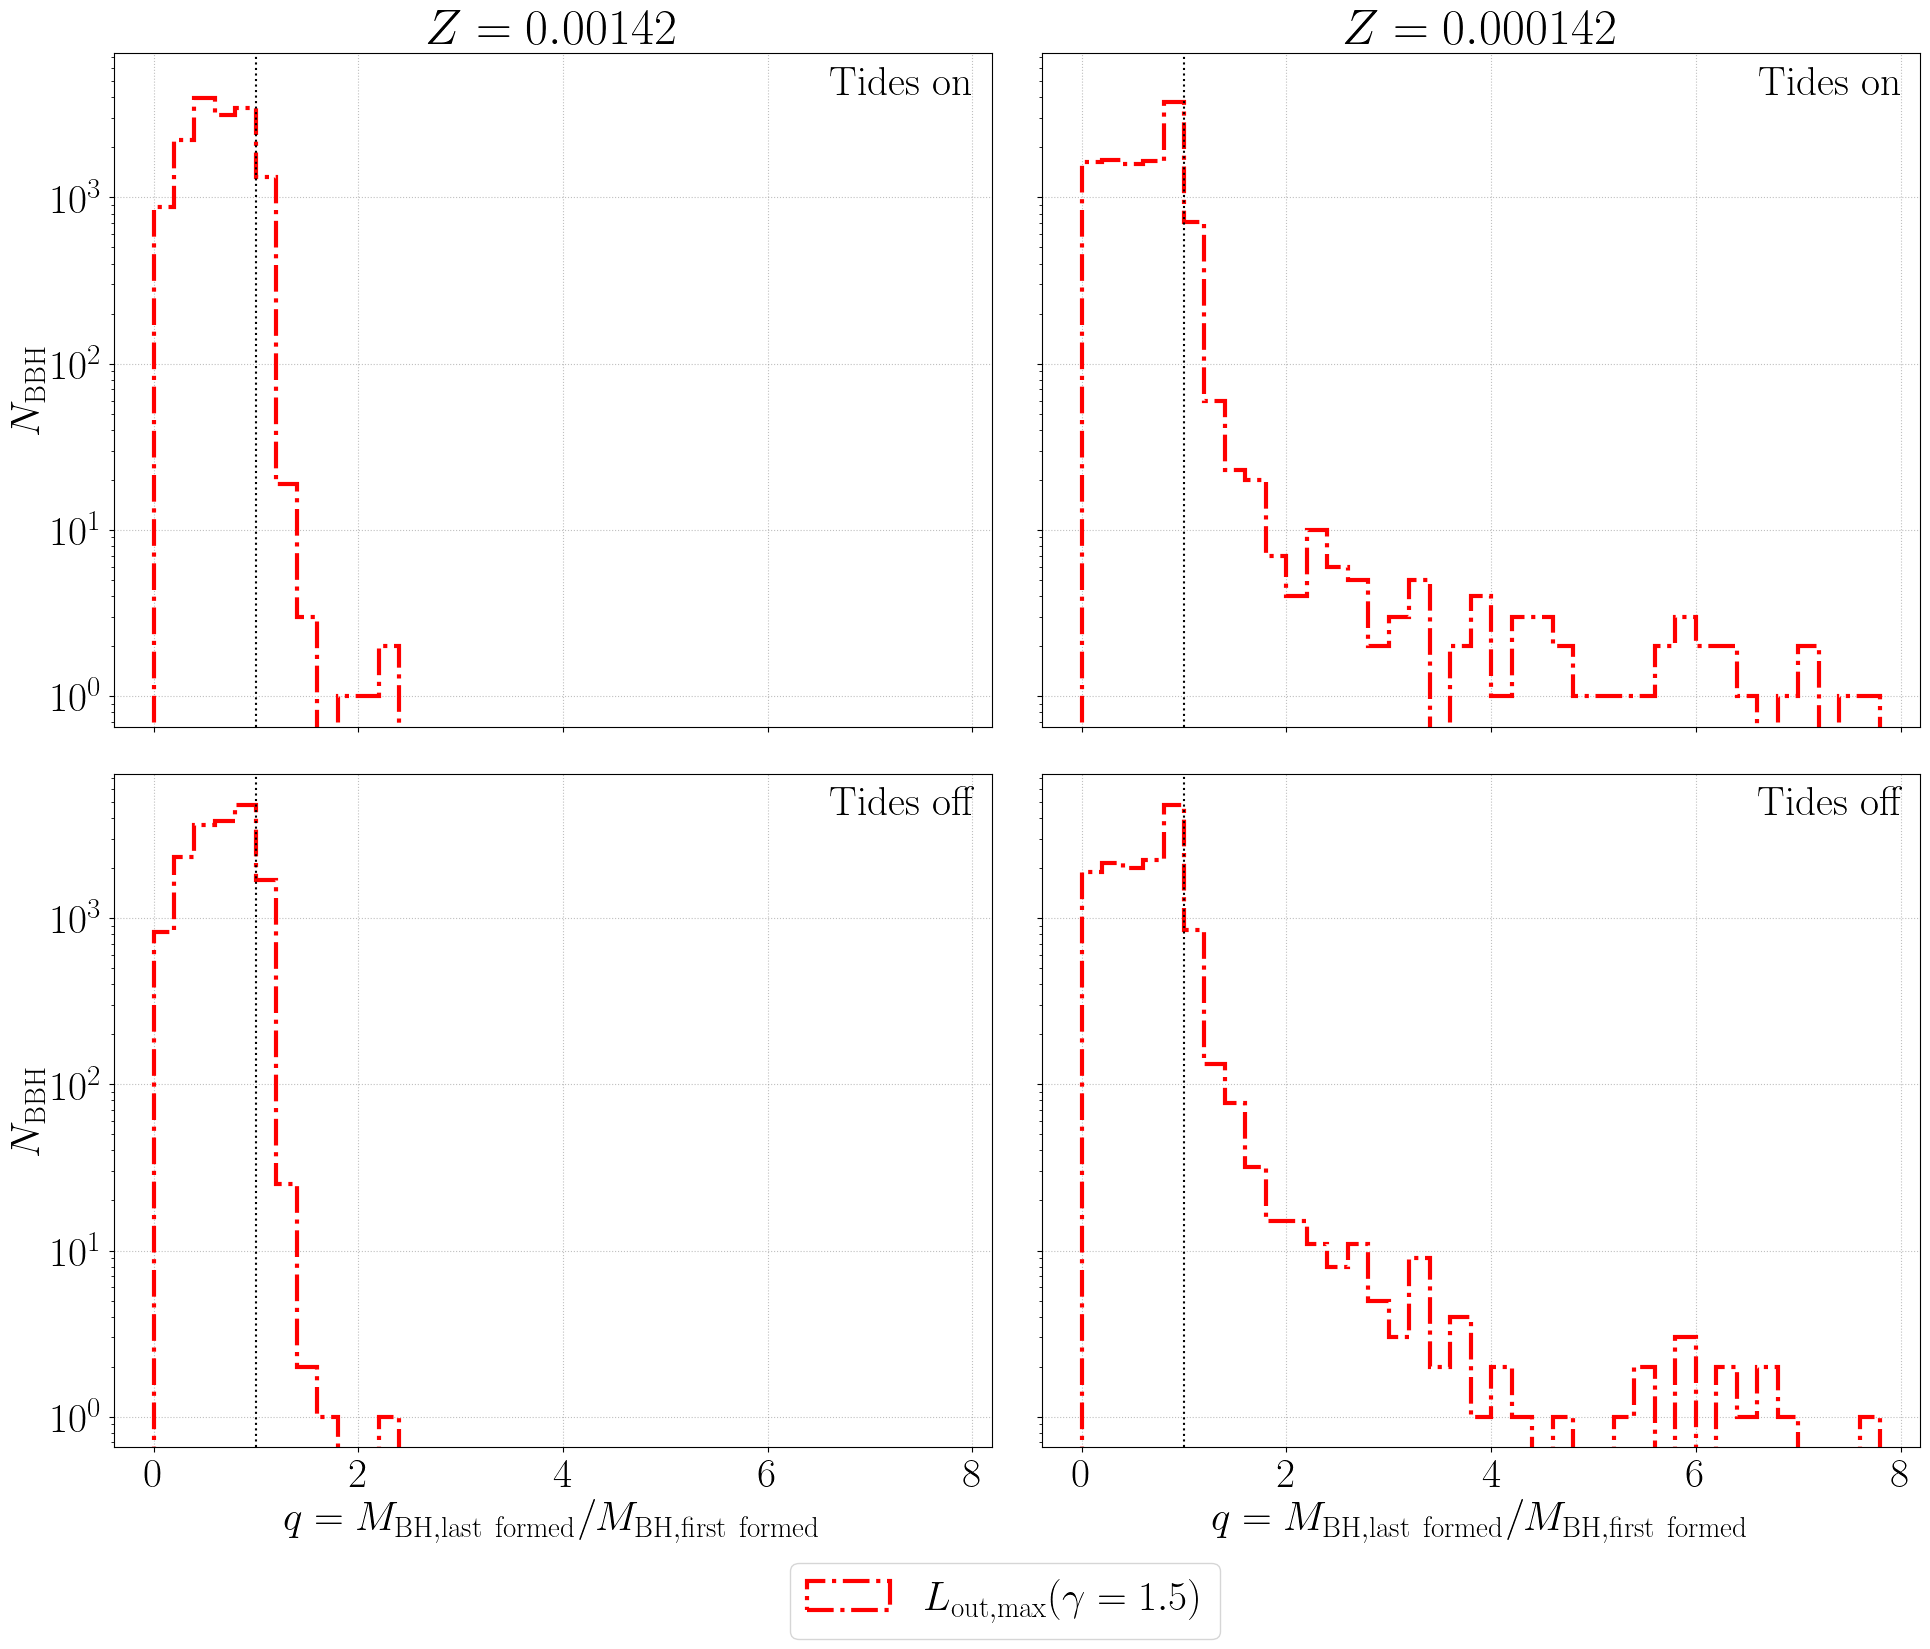

In [9]:
fig, axs = plt.subplots(nrows=len(tides), ncols=len(Zs), sharex=True, sharey=True, figsize=(20,17))   #20,30
bin_edges_q=np.arange(0,8,0.2)       # 0.1 is the witdth of each bin

labels1=['Isotropic re-emission','Jeans mode',r'$L_{\rm out,min} (\gamma =1 )$',r'$L_{\rm out,max} (\gamma = 1.5)$']
labels2=[r'$L_{\rm out,max} (\gamma = 1.5)$']
tidelabels = [r'Tides on' ,r'Tides off']
colors1=['k','dodgerblue','darkgreen','red']
colors2=['red']
linestyles1=['solid','dashed','dotted','dashdot']
linestyles2=['dashdot']

for Z, icol in zip(Zs,np.arange(0,len(Zs))):
    labels, colors, linestyles,angmoms = labels2, colors2,linestyles2,angmoms2
    for tide, irow, tidelabel in zip(tides,np.arange(0,len(tides)),tidelabels):
        for angmom, label, color,linestyle in zip(angmoms, labels, colors,linestyles):
            path_results = f'./v_{sevn_version}'  # path to new folder with all useful results
            df = pd.read_csv(f'{path_results}/remnants/BHBH_GW/Z{Z}_{angmom}_{tide}_r_BHBH_GW.csv')

            axs[irow][icol].hist(df['Mass_1']/df['Mass_0'], bins=bin_edges_q, label=label, color=color, linestyle=linestyle, lw=3, log=True, histtype='step',density=False)
        
        axs[irow][icol].axvline(x=1, linestyle='dotted',color='k')
        #axs[irow][icol].set_xticks(np.array([0,2]))
        axs[irow][icol].annotate(tidelabel, (0.98,0.94),xycoords='axes fraction', color='k',ha='right')
        axs[irow][icol].grid(color='grey',alpha=0.5, linestyle='dotted')
        
#plt.suptitle(r'Primary mass distribution $M_1$ of BBH and GW-BBH')
axs[0][0].set_title(r'$Z=0.00142$')
axs[0][1].set_title(r'$Z=0.000142$')
axs[0][0].set_ylabel(r'$N_{\rm BBH}$')
axs[1][0].set_ylabel(r'$N_{\rm BBH}$')
axs[1][0].set_xlabel(r'$q = M_{\rm BH, last~ formed} / M_{\rm BH, first~ formed}$')
axs[1][1].set_xlabel(r'$q = M_{\rm BH, last~ formed} / M_{\rm BH, first~ formed}$')


handles, labels = axs[0][0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=4, bbox_to_anchor=(0.52,0.005))   
plt.tight_layout()
fig.subplots_adjust(bottom=0.13, top=0.95)
plt.show()
fig.savefig(f'{path_plots}BBH_q.pdf')


# q distribution (min/max massive)

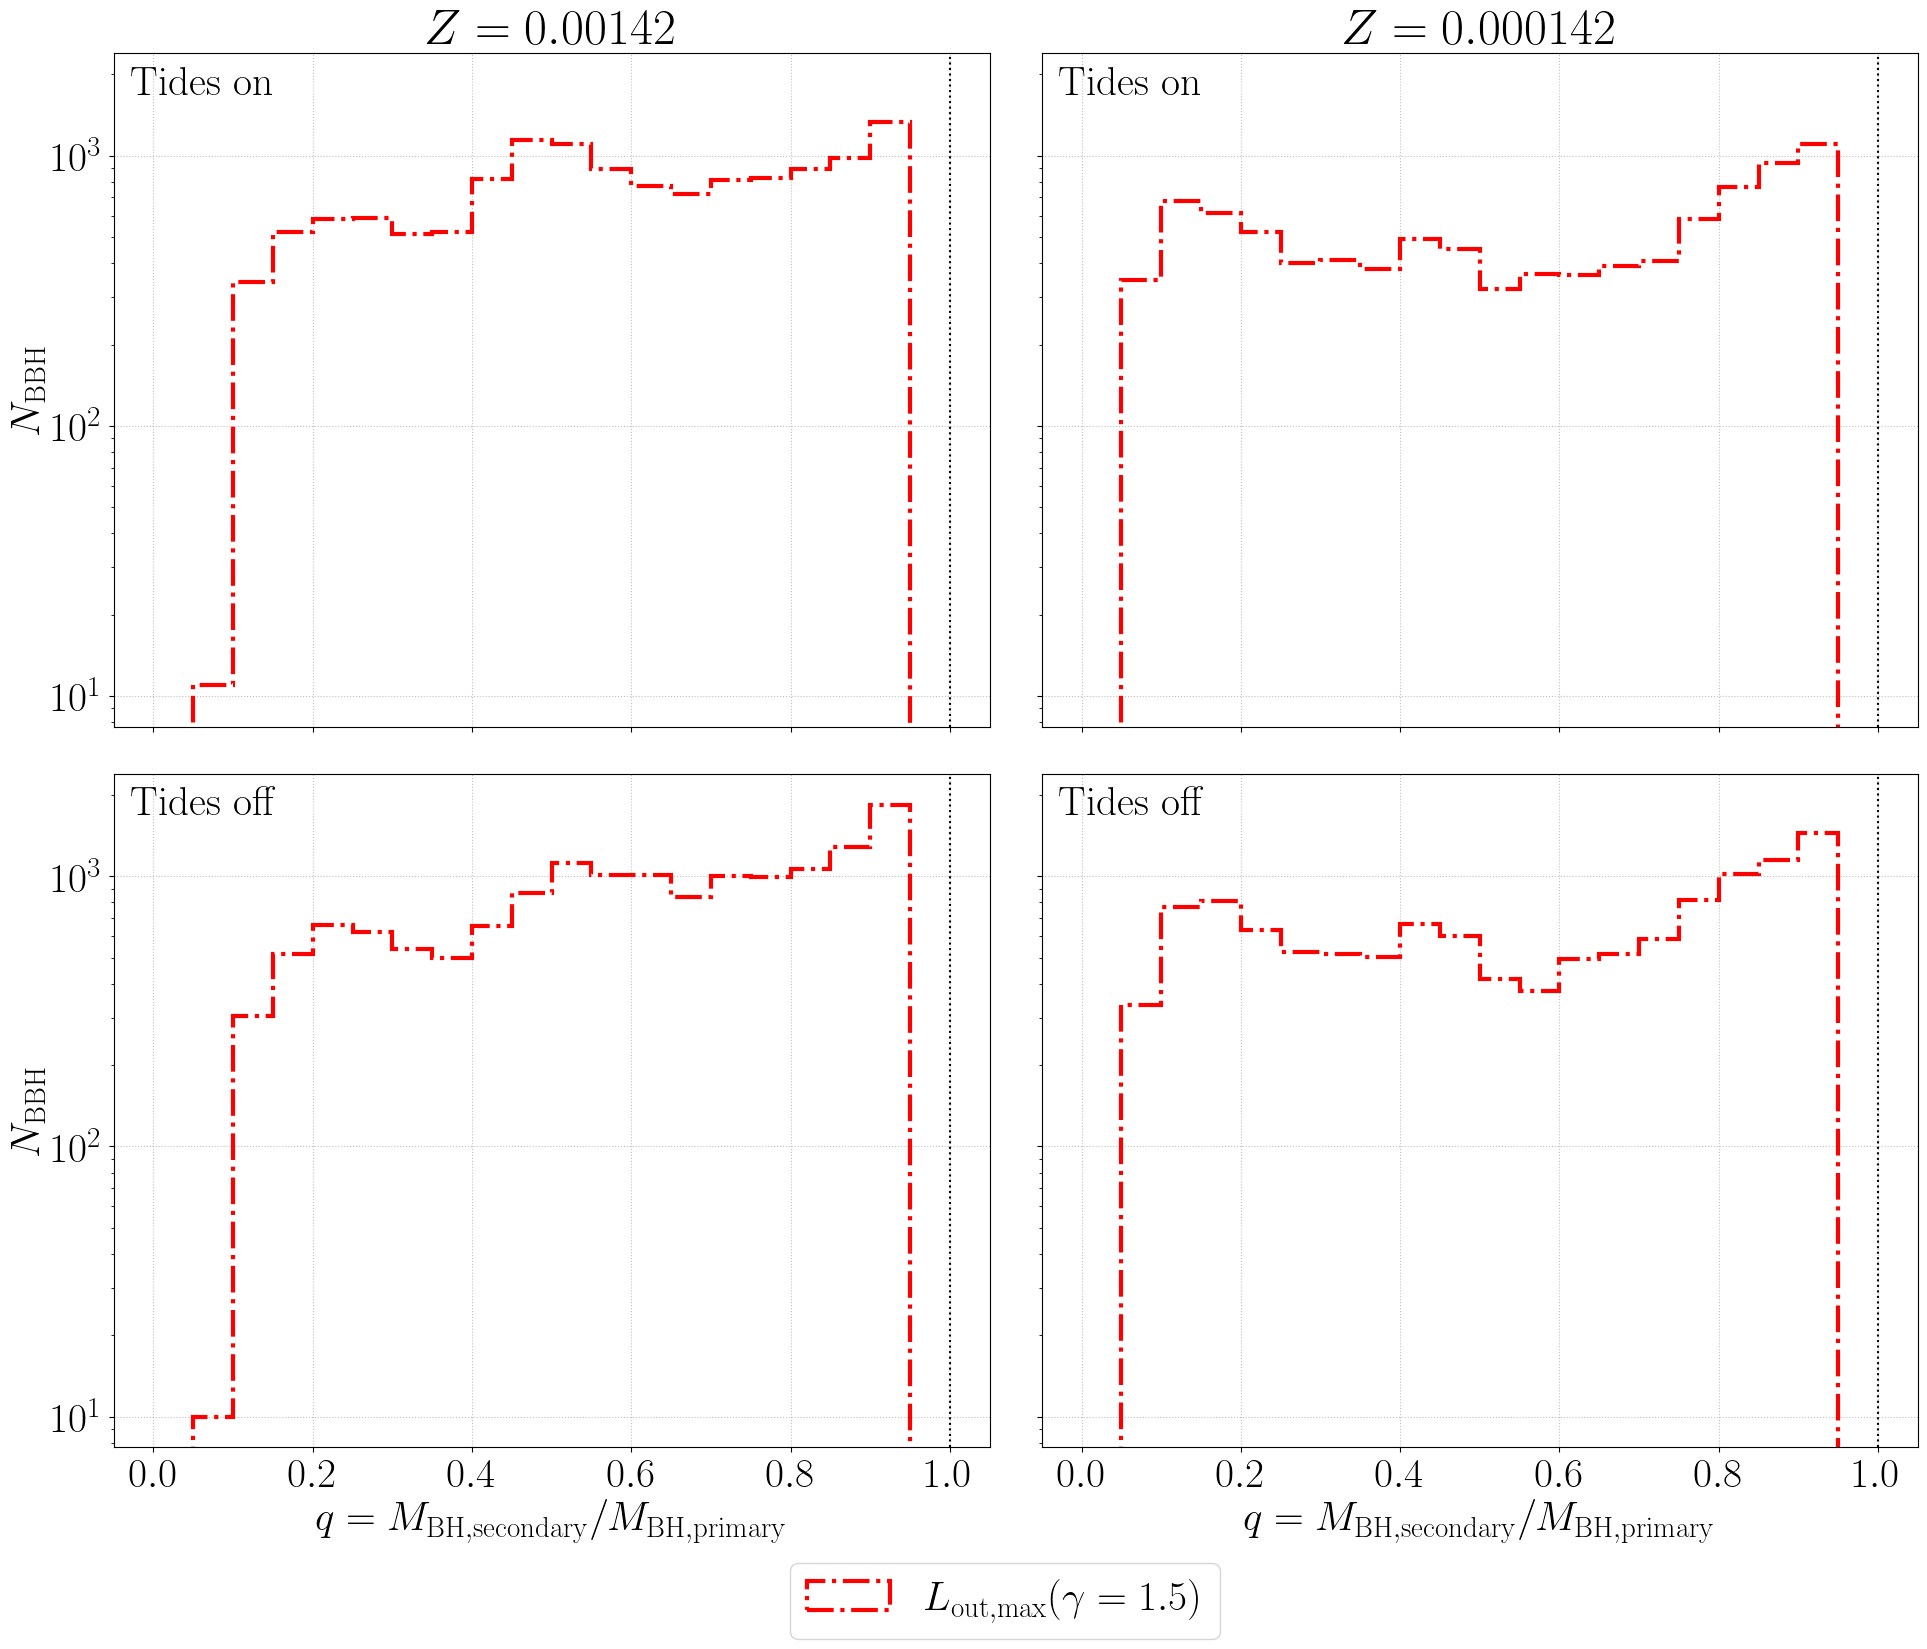

In [10]:
fig, axs = plt.subplots(nrows=len(tides), ncols=len(Zs), sharex=True, sharey=True, figsize=(20,17))   #20,30
bin_edges_q=np.arange(0,1,0.05)       # 0.1 is the witdth of each bin

labels1=['Isotropic re-emission','Jeans mode',r'$L_{\rm out,min} (\gamma =1 )$',r'$L_{\rm out,max} (\gamma = 1.5)$']
labels2=[r'$L_{\rm out,max} (\gamma = 1.5)$']
tidelabels = [r'Tides on' ,r'Tides off']
colors1=['k','dodgerblue','darkgreen','red']
colors2=['red']
linestyles1=['solid','dashed','dotted','dashdot']
linestyles2=['dashdot']

for Z, icol in zip(Zs,np.arange(0,len(Zs))):
    labels, colors, linestyles,angmoms = labels2, colors2,linestyles2,angmoms2
    for tide, irow, tidelabel in zip(tides,np.arange(0,len(tides)),tidelabels):
        for angmom, label, color,linestyle in zip(angmoms, labels, colors,linestyles):
            path_results = f'./v_{sevn_version}'  # path to new folder with all useful results
            df = pd.read_csv(f'{path_results}/remnants/BHBH_GW/Z{Z}_{angmom}_{tide}_r_BHBH_GW.csv')
            df['Mass_max'] = np.max(df[['Mass_0','Mass_1']],axis=1)
            df['Mass_min'] = np.min(df[['Mass_0','Mass_1']],axis=1)

            axs[irow][icol].hist(df['Mass_min']/df['Mass_max'], bins=bin_edges_q, label=label, color=color, linestyle=linestyle, lw=3, log=True, histtype='step',density=False)
        
        axs[irow][icol].axvline(x=1, linestyle='dotted',color='k')
        #axs[irow][icol].set_xticks(np.array([0,2]))
        axs[irow][icol].annotate(tidelabel, (0.02,0.94),xycoords='axes fraction', color='k',ha='left')
        axs[irow][icol].grid(color='grey',alpha=0.5, linestyle='dotted')
        
#plt.suptitle(r'Primary mass distribution $M_1$ of BBH and GW-BBH')
axs[0][0].set_title(r'$Z=0.00142$')
axs[0][1].set_title(r'$Z=0.000142$')
axs[0][0].set_ylabel(r'$N_{\rm BBH}$')
axs[1][0].set_ylabel(r'$N_{\rm BBH}$')
axs[1][0].set_xlabel(r'$q = M_{\rm BH, secondary} / M_{\rm BH, primary}$')
axs[1][1].set_xlabel(r'$q = M_{\rm BH, secondary} / M_{\rm BH, primary}$')


handles, labels = axs[0][0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=4, bbox_to_anchor=(0.52,0.005))   
plt.tight_layout()
fig.subplots_adjust(bottom=0.13, top=0.95)
plt.show()
fig.savefig(f'{path_plots}BBH_q_minmax.pdf')


# MS-BH that are progenitors of GW merging BBH

# BH mass (that is the one from the most massive one)

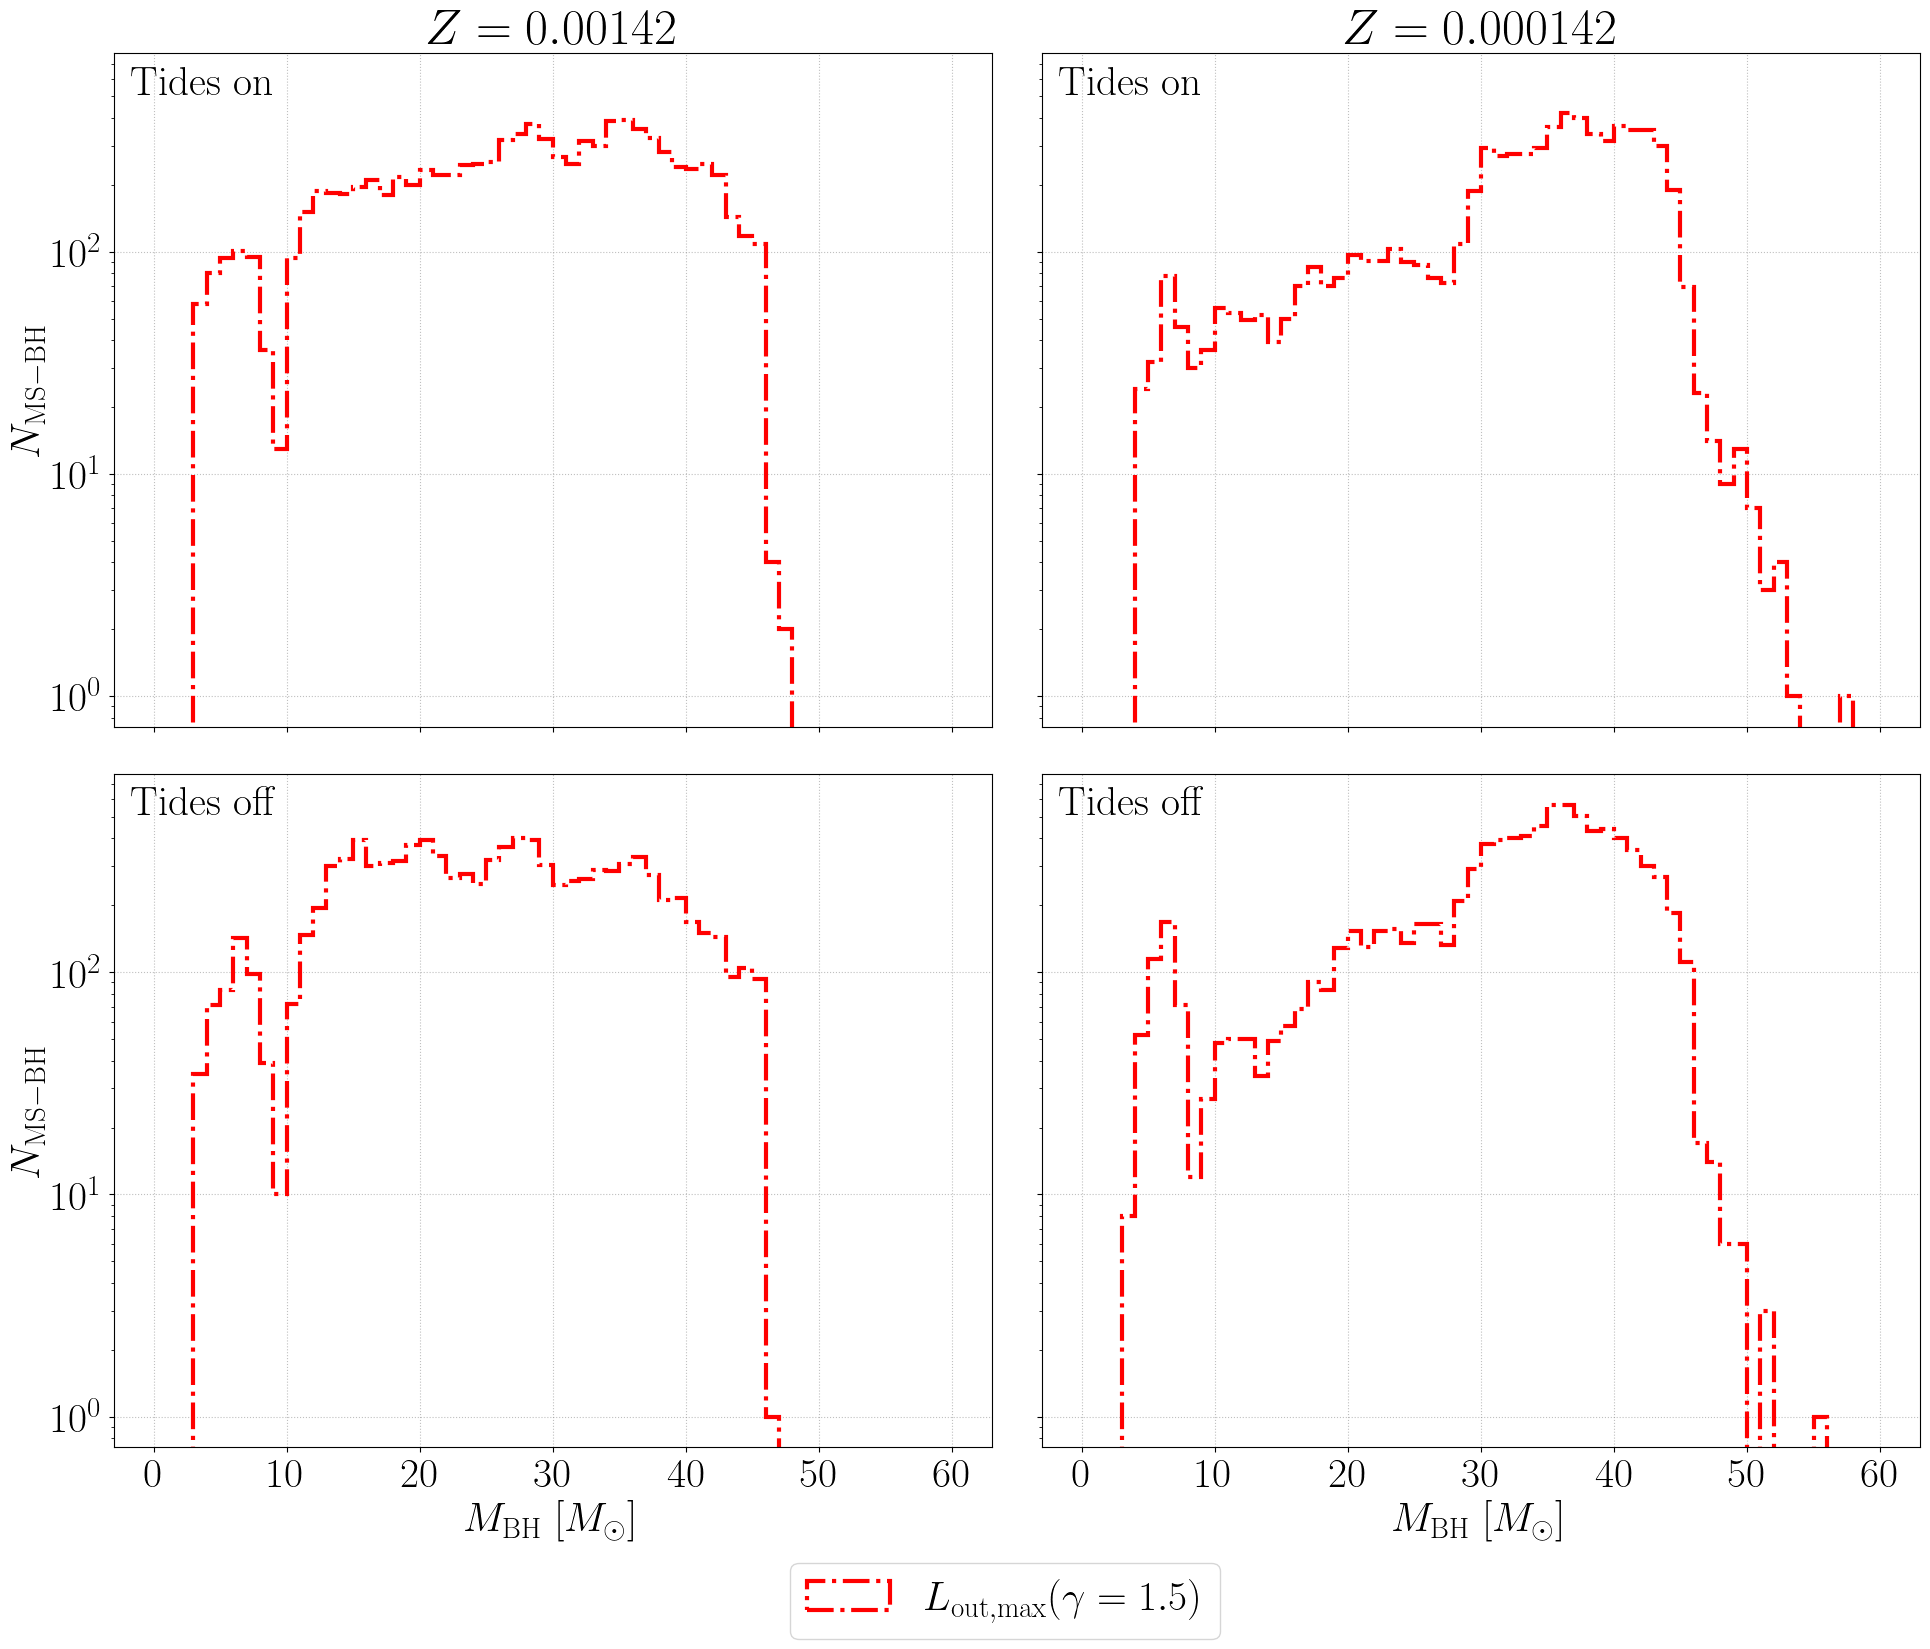

In [11]:
fig, axs = plt.subplots(nrows=len(tides), ncols=len(Zs), sharex=True, sharey=True, figsize=(20,17))   #20,30
bin_edges_mass=np.arange(0,61,1)       # 1 M_sun is the witdth of each bin

labels1=['Isotropic re-emission','Jeans mode',r'$L_{\rm out,min} (\gamma =1 )$',r'$L_{\rm out,max} (\gamma = 1.5)$']
labels2=[r'$L_{\rm out,max} (\gamma = 1.5)$']
tidelabels = [r'Tides on' ,r'Tides off']
colors1=['k','dodgerblue','darkgreen','red']
colors2=['red']
linestyles1=['solid','dashed','dotted','dashdot']
linestyles2=['dashdot']

for Z, icol in zip(Zs,np.arange(0,len(Zs))):
    labels, colors, linestyles,angmoms = labels2, colors2,linestyles2,angmoms2
    for tide, irow, tidelabel in zip(tides,np.arange(0,len(tides)),tidelabels):
        for angmom, label, color,linestyle in zip(angmoms, labels, colors,linestyles):
            path_results = f'./v_{sevn_version}'  # path to new folder with all useful results
            df = pd.read_csv(f'{path_results}/initial/BHBH_GW_MSBH/Z{Z}_{angmom}_{tide}_i_BHBH_GW_MSBH.csv')

            axs[irow][icol].hist(df['Mass_0'], bins=bin_edges_mass, label=label, color=color, linestyle=linestyle, lw=3, log=True, histtype='step',density=False)
        axs[irow][icol].set_xticks(np.array([0,10,20,30,40,50,60]))
        axs[irow][icol].annotate(tidelabel, (0.02,0.94),xycoords='axes fraction', color='k',ha='left')
        axs[irow][icol].grid(color='grey',alpha=0.5, linestyle='dotted')
        
#plt.suptitle(r'Primary mass distribution $M_1$ of BBH and GW-BBH')
axs[0][0].set_title(r'$Z=0.00142$')
axs[0][1].set_title(r'$Z=0.000142$')
axs[0][0].set_ylabel(r'$N_{\rm MS-BH}$')
axs[1][0].set_ylabel(r'$N_{\rm MS-BH}$')
axs[1][0].set_xlabel(r'$M_{\rm BH}$ [$M_\odot$]')
axs[1][1].set_xlabel(r'$M_{\rm BH}$ [$M_\odot$]')


handles, labels = axs[0][0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=4, bbox_to_anchor=(0.52,0.005))   
plt.tight_layout()
fig.subplots_adjust(bottom=0.13, top=0.95)
plt.show()
fig.savefig(f'{path_plots}MSBH_MBH.pdf')


# Mass of MS star 

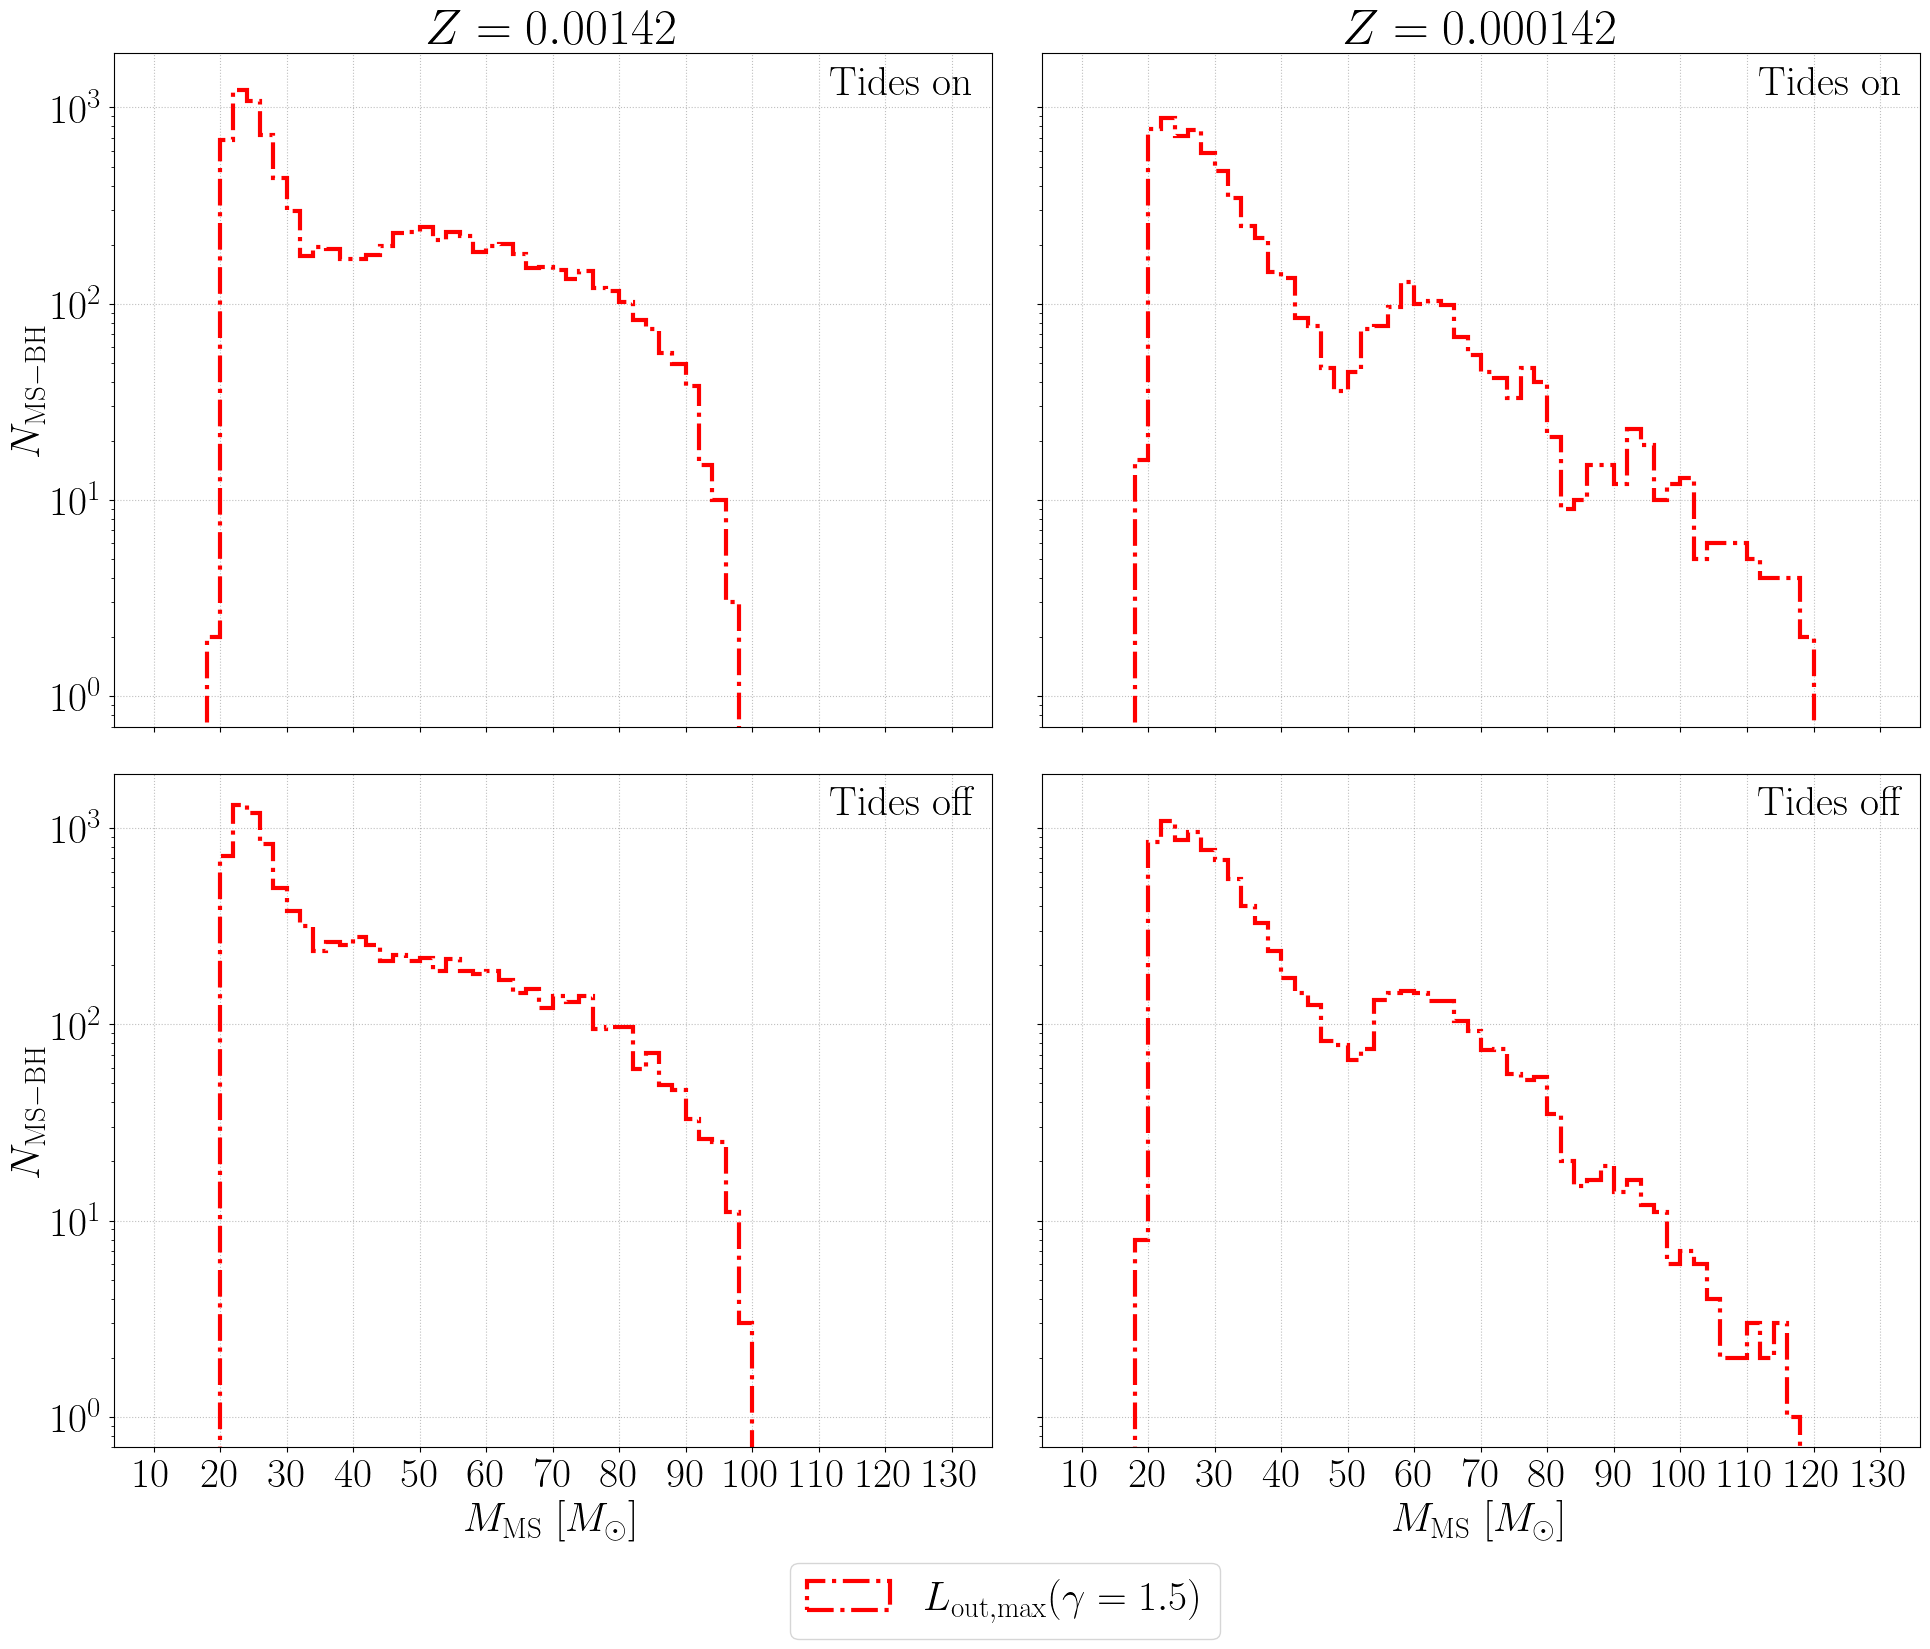

In [12]:
fig, axs = plt.subplots(nrows=len(tides), ncols=len(Zs), sharex=True, sharey=True, figsize=(20,17))   #20,30
bin_edges_mass=np.arange(10,131,2)       # 1 M_sun is the witdth of each bin

labels1=['Isotropic re-emission','Jeans mode',r'$L_{\rm out,min} (\gamma =1 )$',r'$L_{\rm out,max} (\gamma = 1.5)$']
labels2=[r'$L_{\rm out,max} (\gamma = 1.5)$']
tidelabels = [r'Tides on' ,r'Tides off']
colors1=['k','dodgerblue','darkgreen','red']
colors2=['red']
linestyles1=['solid','dashed','dotted','dashdot']
linestyles2=['dashdot']

for Z, icol in zip(Zs,np.arange(0,len(Zs))):
    labels, colors, linestyles,angmoms = labels2, colors2,linestyles2,angmoms2
    for tide, irow, tidelabel in zip(tides,np.arange(0,len(tides)),tidelabels):
        for angmom, label, color,linestyle in zip(angmoms, labels, colors,linestyles):
            path_results = f'./v_{sevn_version}'  # path to new folder with all useful results
            df = pd.read_csv(f'{path_results}/initial/BHBH_GW_MSBH/Z{Z}_{angmom}_{tide}_i_BHBH_GW_MSBH.csv')

            axs[irow][icol].hist(df['Mass_1'], bins=bin_edges_mass, label=label, color=color, linestyle=linestyle, lw=3, log=True, histtype='step',density=False)
        axs[irow][icol].set_xticks(np.array([10,20,30,40,50,60,70,80,90,100,110,120,130]))
        axs[irow][icol].annotate(tidelabel, (0.98,0.94),xycoords='axes fraction', color='k',ha='right')
        axs[irow][icol].grid(color='grey',alpha=0.5, linestyle='dotted')
        
#plt.suptitle(r'Primary mass distribution $M_1$ of BBH and GW-BBH')
axs[0][0].set_title(r'$Z=0.00142$')
axs[0][1].set_title(r'$Z=0.000142$')
axs[0][0].set_ylabel(r'$N_{\rm MS-BH}$')
axs[1][0].set_ylabel(r'$N_{\rm MS-BH}$')
axs[1][0].set_xlabel(r'$M_{\rm MS}$ [$M_\odot$]')
axs[1][1].set_xlabel(r'$M_{\rm MS}$ [$M_\odot$]')


handles, labels = axs[0][0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=4, bbox_to_anchor=(0.52,0.005))   
plt.tight_layout()
fig.subplots_adjust(bottom=0.13, top=0.95)
plt.show()
fig.savefig(f'{path_plots}MSBH_MMS.pdf')


# q = MBH/MMS

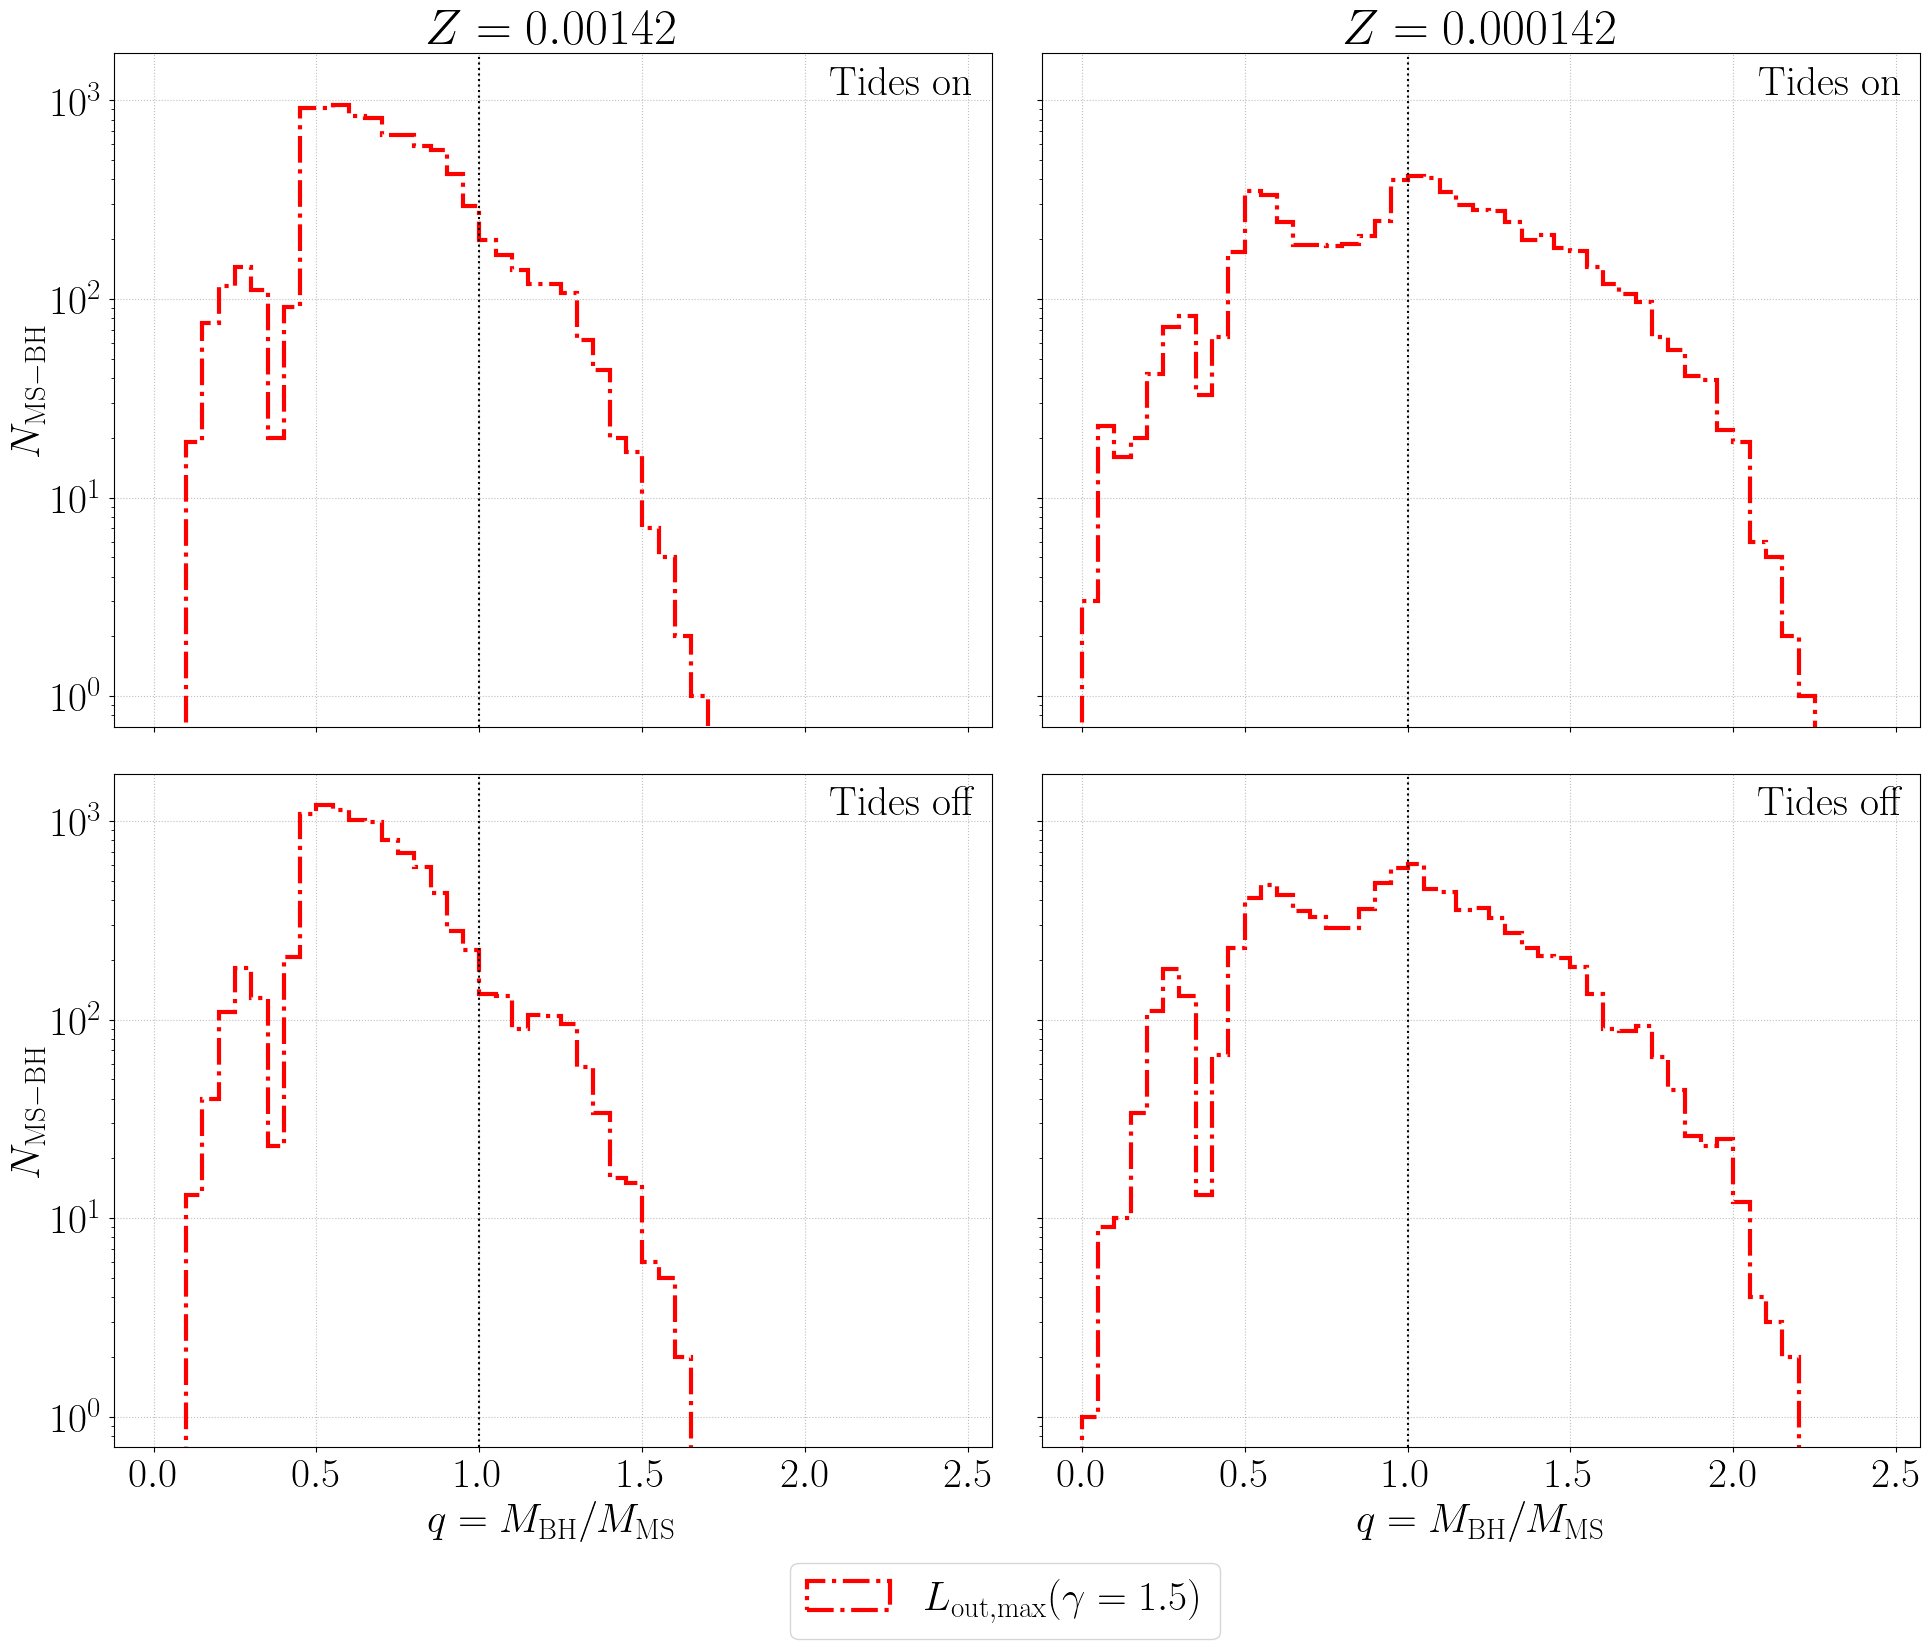

In [13]:
fig, axs = plt.subplots(nrows=len(tides), ncols=len(Zs), sharex=True, sharey=True, figsize=(20,17))   #20,30
bin_edges_q=np.arange(0,2.5,0.05)       # 0.1 is the witdth of each bin

labels1=['Isotropic re-emission','Jeans mode',r'$L_{\rm out,min} (\gamma =1 )$',r'$L_{\rm out,max} (\gamma = 1.5)$']
labels2=[r'$L_{\rm out,max} (\gamma = 1.5)$']
tidelabels = [r'Tides on' ,r'Tides off']
colors1=['k','dodgerblue','darkgreen','red']
colors2=['red']
linestyles1=['solid','dashed','dotted','dashdot']
linestyles2=['dashdot']

for Z, icol in zip(Zs,np.arange(0,len(Zs))):
    labels, colors, linestyles,angmoms = labels2, colors2,linestyles2,angmoms2
    for tide, irow, tidelabel in zip(tides,np.arange(0,len(tides)),tidelabels):
        for angmom, label, color,linestyle in zip(angmoms, labels, colors,linestyles):
            path_results = f'./v_{sevn_version}'  # path to new folder with all useful results
            df = pd.read_csv(f'{path_results}/initial/BHBH_GW_MSBH/Z{Z}_{angmom}_{tide}_i_BHBH_GW_MSBH.csv')

            axs[irow][icol].hist(df['Mass_0']/df['Mass_1'], bins=bin_edges_q, label=label, color=color, linestyle=linestyle, lw=3, log=True, histtype='step',density=False)

        axs[irow][icol].axvline(x=1, linestyle='dotted',color='k')
        axs[irow][icol].annotate(tidelabel, (0.98,0.94),xycoords='axes fraction', color='k',ha='right')
        axs[irow][icol].grid(color='grey',alpha=0.5, linestyle='dotted')
        
#plt.suptitle(r'Primary mass distribution $M_1$ of BBH and GW-BBH')
axs[0][0].set_title(r'$Z=0.00142$')
axs[0][1].set_title(r'$Z=0.000142$')
axs[0][0].set_ylabel(r'$N_{\rm MS-BH}$')
axs[1][0].set_ylabel(r'$N_{\rm MS-BH}$')
axs[1][0].set_xlabel(r'$q=M_{\rm BH} / M_{\rm MS}$')
axs[1][1].set_xlabel(r'$q=M_{\rm BH} / M_{\rm MS}$')


handles, labels = axs[0][0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=4, bbox_to_anchor=(0.52,0.005))   
plt.tight_layout()
fig.subplots_adjust(bottom=0.13, top=0.95)
plt.show()
fig.savefig(f'{path_plots}MSBH_qBHMS.pdf')


# Semimajor MS-BH

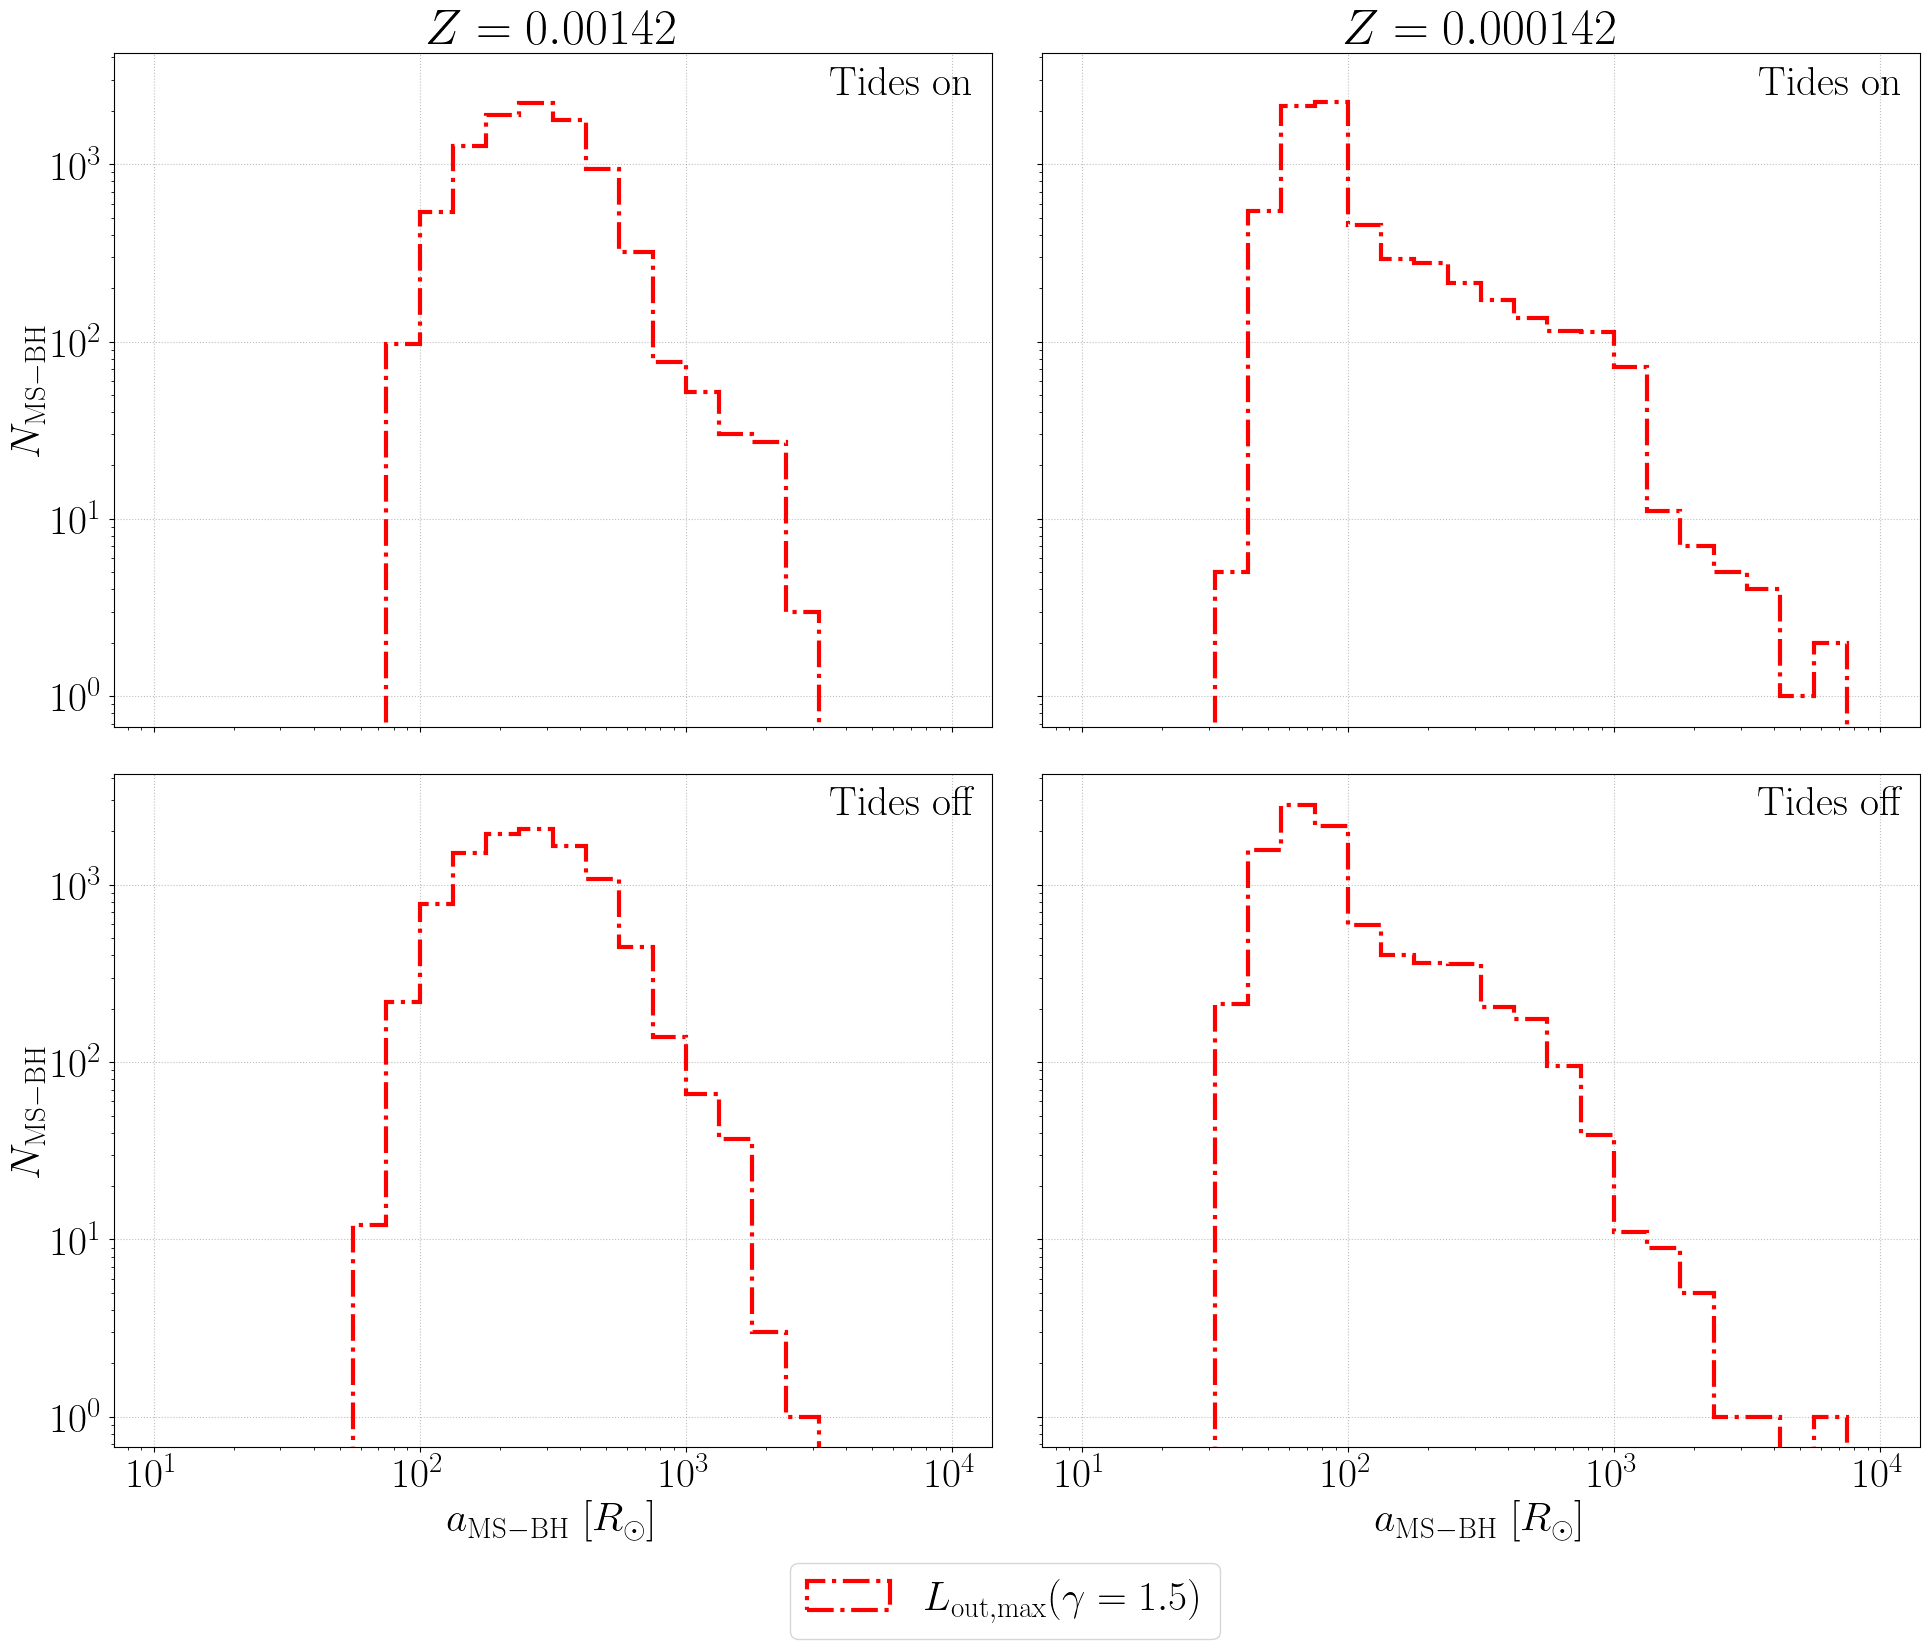

In [14]:
fig, axs = plt.subplots(nrows=len(tides), ncols=len(Zs), sharex=True, sharey=True, figsize=(20,17))   #20,30
bin_edges_semimajor=np.logspace(np.log10(10),np.log10(1e4),25)  # divide into 25 bins

labels1=['Isotropic re-emission','Jeans mode',r'$L_{\rm out,min} (\gamma =1 )$',r'$L_{\rm out,max} (\gamma = 1.5)$']
labels2=[r'$L_{\rm out,max} (\gamma = 1.5)$']
tidelabels = [r'Tides on' ,r'Tides off']
colors1=['k','dodgerblue','darkgreen','red']
colors2=['red']
linestyles1=['solid','dashed','dotted','dashdot']
linestyles2=['dashdot']

for Z, icol in zip(Zs,np.arange(0,len(Zs))):
    labels, colors, linestyles,angmoms = labels2, colors2,linestyles2,angmoms2
    for tide, irow, tidelabel in zip(tides,np.arange(0,len(tides)),tidelabels):
        for angmom, label, color,linestyle in zip(angmoms, labels, colors,linestyles):
            path_results = f'./v_{sevn_version}'  # path to new folder with all useful results
            df = pd.read_csv(f'{path_results}/initial/BHBH_GW_MSBH/Z{Z}_{angmom}_{tide}_i_BHBH_GW_MSBH.csv')
            axs[irow][icol].hist(df['Semimajor'], bins=bin_edges_semimajor, label=label, color=color, linestyle=linestyle, lw=3, log=True, histtype='step',density=False)
        
        axs[irow][icol].set_xscale('log')
        #axs[irow][icol].set_xticks(np.array([0,10,20,30,40,50]))
        axs[irow][icol].annotate(tidelabel, (0.98,0.94),xycoords='axes fraction', color='k',ha='right')
        axs[irow][icol].grid(color='grey',alpha=0.5, linestyle='dotted')
        
#plt.suptitle(r'Primary mass distribution $M_1$ of BBH and GW-BBH')
axs[0][0].set_title(r'$Z=0.00142$')
axs[0][1].set_title(r'$Z=0.000142$')
axs[0][0].set_ylabel(r'$N_{\rm MS-BH}$')
axs[1][0].set_ylabel(r'$N_{\rm MS-BH}$')
axs[1][0].set_xlabel(r'$a_{\rm MS-BH}$ [$R_\odot$]')
axs[1][1].set_xlabel(r'$a_{\rm MS-BH}$ [$R_\odot$]')


handles, labels = axs[0][0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=4, bbox_to_anchor=(0.52,0.005))   
plt.tight_layout()
fig.subplots_adjust(bottom=0.13, top=0.95)
plt.show()
fig.savefig(f'{path_plots}MSBH_aMSBH.pdf')


# Period of MS-BH

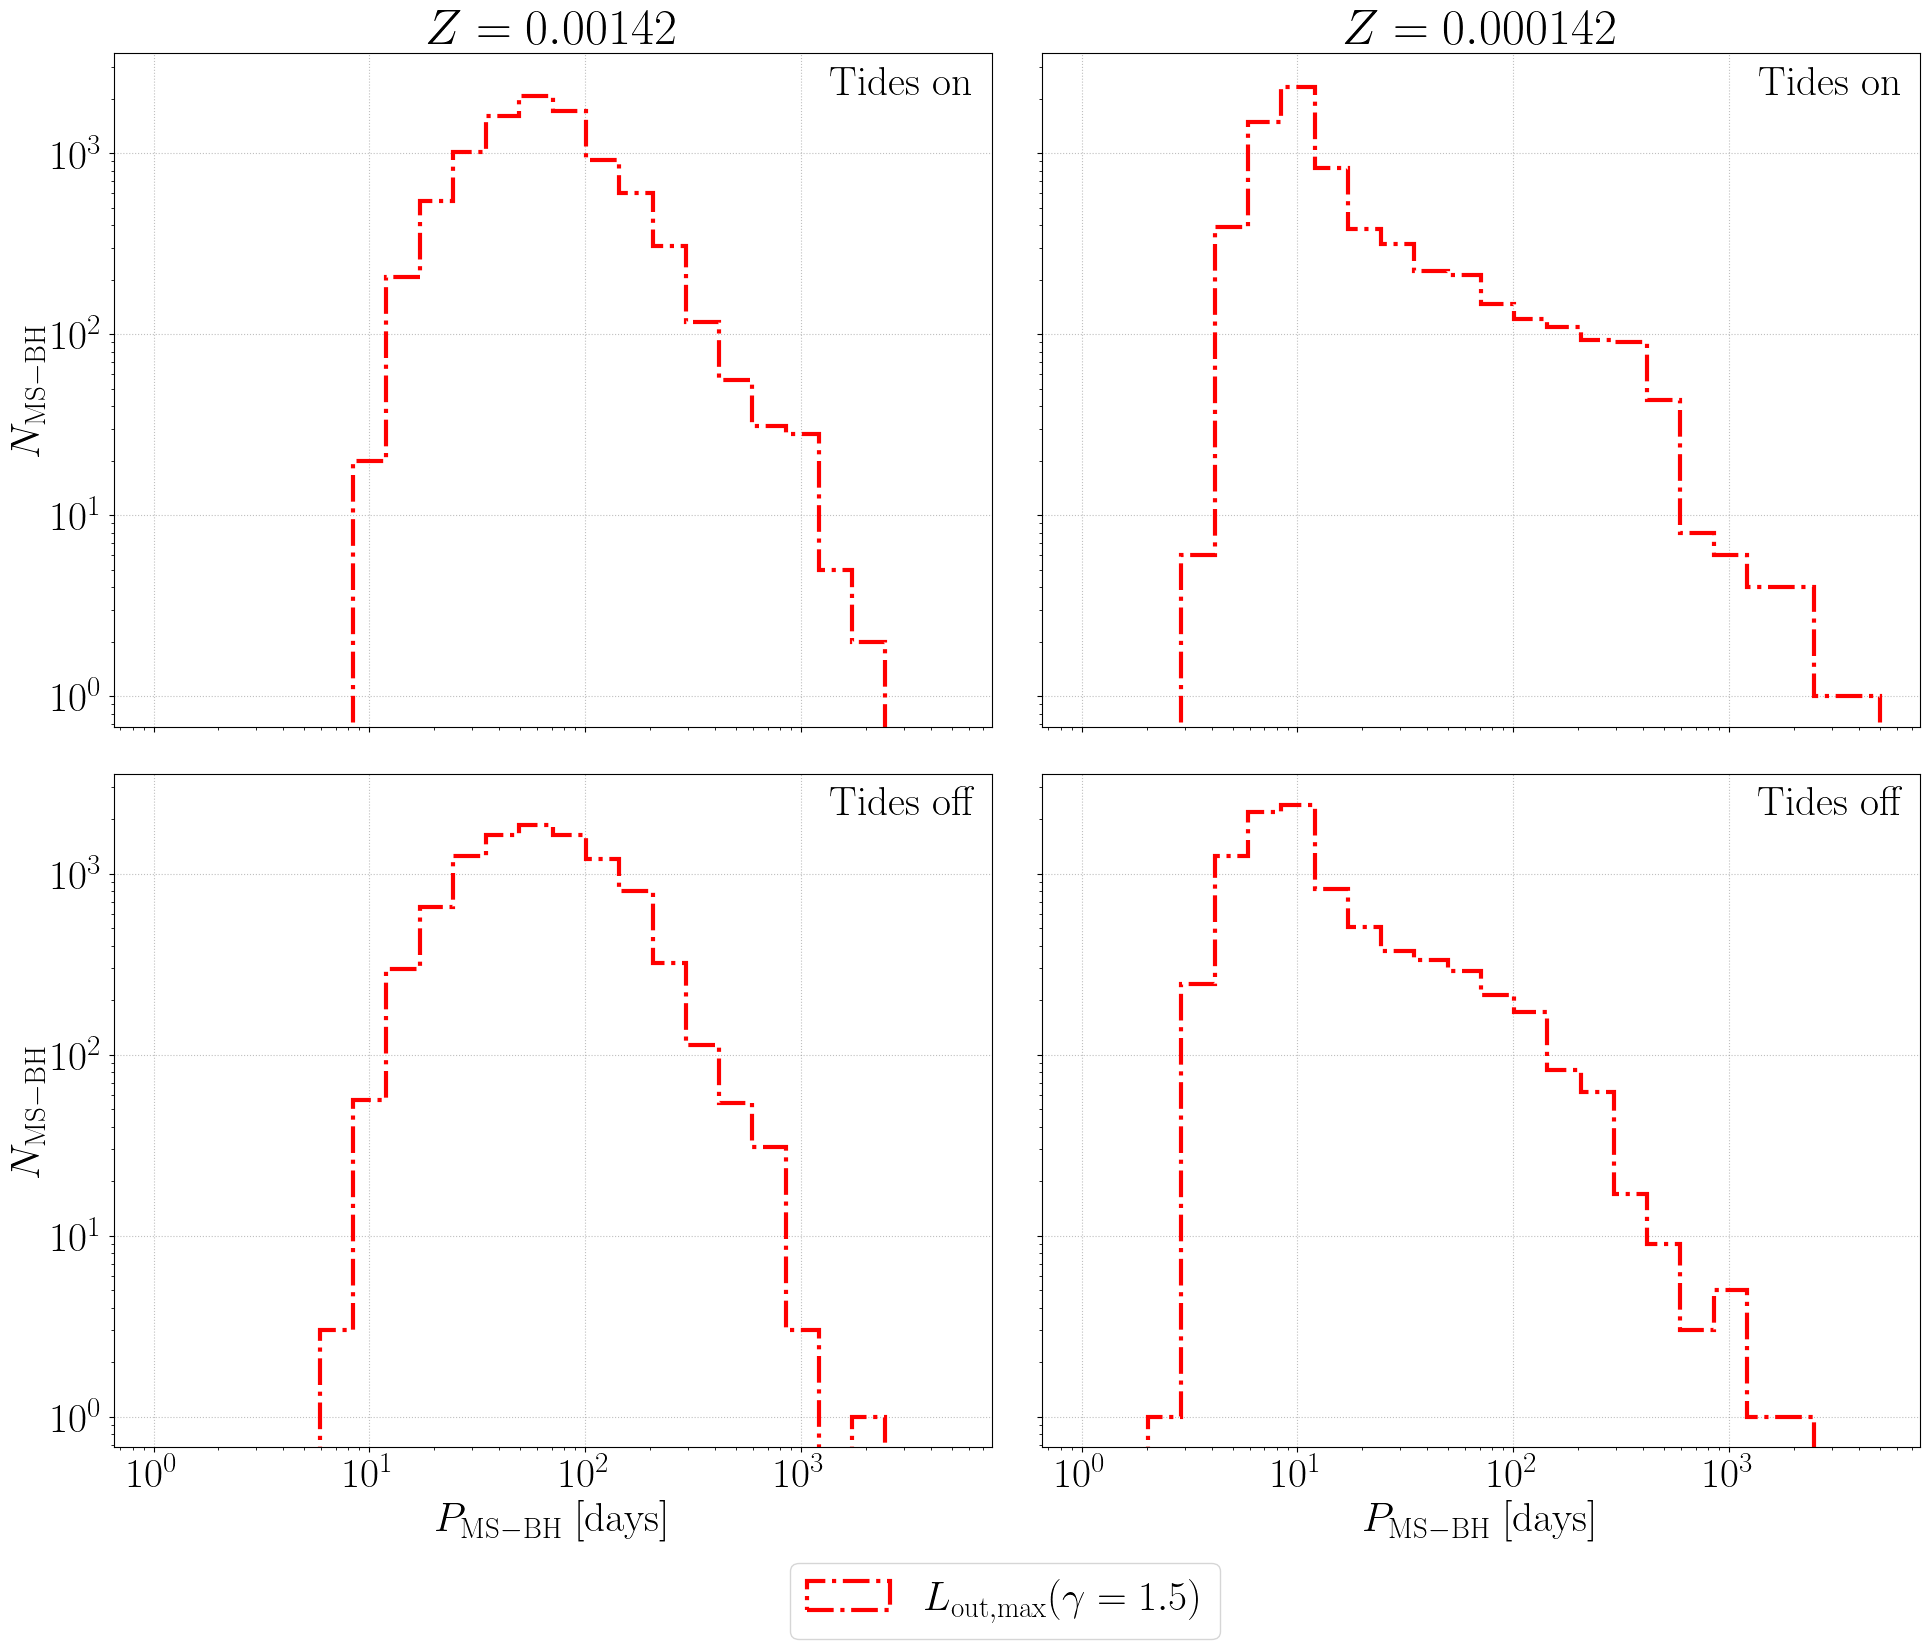

In [15]:
fig, axs = plt.subplots(nrows=len(tides), ncols=len(Zs), sharex=True, sharey=True, figsize=(20,17))   #20,30
bin_edges_period=np.logspace(np.log10(1),np.log10(5000),25)  # log period in days


labels1=['Isotropic re-emission','Jeans mode',r'$L_{\rm out,min} (\gamma =1 )$',r'$L_{\rm out,max} (\gamma = 1.5)$']
labels2=[r'$L_{\rm out,max} (\gamma = 1.5)$']
tidelabels = [r'Tides on' ,r'Tides off']
colors1=['k','dodgerblue','darkgreen','red']
colors2=['red']
linestyles1=['solid','dashed','dotted','dashdot']
linestyles2=['dashdot']

for Z, icol in zip(Zs,np.arange(0,len(Zs))):
    labels, colors, linestyles,angmoms = labels2, colors2,linestyles2,angmoms2
    for tide, irow, tidelabel in zip(tides,np.arange(0,len(tides)),tidelabels):
        for angmom, label, color,linestyle in zip(angmoms, labels, colors,linestyles):
            path_results = f'./v_{sevn_version}'  # path to new folder with all useful results
            df = pd.read_csv(f'{path_results}/initial/BHBH_GW_MSBH/Z{Z}_{angmom}_{tide}_i_BHBH_GW_MSBH.csv')
            axs[irow][icol].hist(df['Period']*365.25, bins=bin_edges_period, label=label, color=color, linestyle=linestyle, lw=3, log=True, histtype='step',density=False)
        
        axs[irow][icol].set_xscale('log')
        #axs[irow][icol].set_xticks(np.array([0,10,20,30,40,50]))
        axs[irow][icol].annotate(tidelabel, (0.98,0.94),xycoords='axes fraction', color='k',ha='right')
        axs[irow][icol].grid(color='grey',alpha=0.5, linestyle='dotted')
        
#plt.suptitle(r'Primary mass distribution $M_1$ of BBH and GW-BBH')
axs[0][0].set_title(r'$Z=0.00142$')
axs[0][1].set_title(r'$Z=0.000142$')
axs[0][0].set_ylabel(r'$N_{\rm MS-BH}$')
axs[1][0].set_ylabel(r'$N_{\rm MS-BH}$')
axs[1][0].set_xlabel(r'$P_{\rm MS-BH}$ [days]')
axs[1][1].set_xlabel(r'$P_{\rm MS-BH}$ [days]')


handles, labels = axs[0][0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=4, bbox_to_anchor=(0.52,0.005))   
plt.tight_layout()
fig.subplots_adjust(bottom=0.13, top=0.95)
plt.show()
fig.savefig(f'{path_plots}MSBH_PeriodMSBH.pdf')
